In [1]:
"""This tutorial shows how to train an MATD3 agent on the simple speaker listener multi-particle environment.

Authors: Michael (https://github.com/mikepratt1), Nickua (https://github.com/nicku-a)
"""

import os

import matplotlib.pyplot as plt
import numpy as np
import torch
from pettingzoo.mpe import simple_speaker_listener_v4
from mpe2 import simple_speaker_listener_v4

from agilerl.algorithms import MATD3
from agilerl.algorithms.core.registry import HyperparameterConfig, RLParameter
from agilerl.components.multi_agent_replay_buffer import MultiAgentReplayBuffer
from agilerl.hpo.mutation import Mutations
from agilerl.hpo.tournament import TournamentSelection
from agilerl.utils.utils import (
    create_population,
    default_progress_bar,
    make_multi_agent_vect_envs,
)

/tmp/ipykernel_76394/4085195098.py:11: DeprecationWarning: The environment `pettingzoo.mpe` has been moved to `mpe2` and will be removed in a future release.Please update your imports.
  from pettingzoo.mpe import simple_speaker_listener_v4


[2025-11-23 04:47:17,399] [WARNING] [real_accelerator.py:209:get_accelerator] Setting accelerator to CPU. If you have GPU or other accelerator, we were unable to detect it.


/home/franc/miniconda3/envs/projeto_rl/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


INFO 11-23 04:47:29 [__init__.py:239] No platform detected, vLLM is running on UnspecifiedPlatform
WARNING 11-23 04:47:31 [_custom_ops.py:20] Failed to import from vllm._C with ImportError('libcuda.so.1: cannot open shared object file: No such file or directory')


===== AgileRL Online Multi-Agent Demo =====
Training...


🚀 Training Progress │   0% │                      │ 10000/2000000 steps │ ⏱️ 00:37 │ ⏳ 2:03:44 │ 268.03step/s 

--- Global steps 40000 ---
Steps [10000, 10000, 10000, 10000]
Scores: [-67.7646513174324, -62.58124103007792, -78.36014354785524, -72.30431991576766]
Fitnesses: ['-51.53', '-55.51', '-60.31', '-26.17']
5 fitness avgs: ['-51.53', '-55.51', '-60.31', '-26.17']
Mutations: [None, None, None, None]


🚀 Training Progress │   1% │ ▏                    │ 20000/2000000 steps │ ⏱️ 01:12 │ ⏳ 1:52:30 │ 293.30step/s 

--- Global steps 80000 ---
Steps [20000, 20000, 20000, 20000]
Scores: [-70.31438531461251, -71.55920634461302, -65.66562414221107, -74.64348861094996]
Fitnesses: ['-88.51', '-60.52', '-34.97', '-120.03']
5 fitness avgs: ['-57.34', '-43.34', '-43.25', '-73.10']
Mutations: ['param', 'lr_actor', 'None', 'learn_step']


🚀 Training Progress │   2% │ ▎                    │ 30000/2000000 steps │ ⏱️ 01:55 │ ⏳ 2:04:58 │ 262.74step/s 

--- Global steps 120000 ---
Steps [30000, 30000, 30000, 30000]
Scores: [-77.18476587927073, -71.44272450162795, -64.23680469377724, -69.10566615788069]
Fitnesses: ['-58.65', '-47.81', '-113.28', '-55.17']
5 fitness avgs: ['-48.38', '-44.83', '-75.98', '-47.29']
Mutations: ['head_net.add_node', 'learn_step', 'batch_size', 'encoder.add_node']


🚀 Training Progress │   2% │ ▍                    │ 40000/2000000 steps │ ⏱️ 02:29 │ ⏳ 1:51:20 │ 293.40step/s 

--- Global steps 160000 ---
Steps [40000, 40000, 40000, 40000]
Scores: [-81.76468354945395, -87.83334300063233, -82.26090888691483, -80.53194465315248]
Fitnesses: ['-73.51', '-172.26', '-41.51', '-126.23']
5 fitness avgs: ['-52.00', '-78.53', '-44.00', '-65.18']
Mutations: ['None', 'remove_latent_node', 'param', 'learn_step']


🚀 Training Progress │   2% │ ▌                    │ 50000/2000000 steps │ ⏱️ 03:09 │ ⏳ 1:57:33 │ 276.47step/s 

--- Global steps 200000 ---
Steps [50000, 50000, 50000, 50000]
Scores: [-82.99454603894932, -84.05385060846973, -89.30920268472852, -91.7258673579476]
Fitnesses: ['-68.60', '-81.67', '-115.95', '-92.63']
5 fitness avgs: ['-48.92', '-51.54', '-58.39', '-53.73']
Mutations: ['batch_size', 'None', 'learn_step', 'param']


🚀 Training Progress │   3% │ ▌                    │ 60000/2000000 steps │ ⏱️ 03:46 │ ⏳ 2:01:44 │ 265.58step/s 

--- Global steps 240000 ---
Steps [60000, 60000, 60000, 60000]
Scores: [-90.60132051701767, -84.31007507573656, -89.46096149709324, -86.91220457574775]
Fitnesses: ['-75.48', '-77.15', '-87.46', '-80.29']
5 fitness avgs: ['-58.78', '-59.12', '-61.18', '-62.36']
Mutations: ['add_latent_node', 'param', 'None', 'head_net.remove_node']


🚀 Training Progress │   4% │ ▋                    │ 70000/2000000 steps │ ⏱️ 04:21 │ ⏳ 1:54:16 │ 281.48step/s 

--- Global steps 280000 ---
Steps [70000, 70000, 70000, 70000]
Scores: [-88.38158756751335, -87.13682722314849, -96.26943264056081, -84.53166535203003]
Fitnesses: ['-135.45', '-108.76', '-59.78', '-70.95']
5 fitness avgs: ['-73.77', '-68.43', '-62.21', '-61.20']
Mutations: ['None', 'lr_critic', 'lr_actor', 'param']


🚀 Training Progress │   4% │ ▊                    │ 80000/2000000 steps │ ⏱️ 04:56 │ ⏳ 1:51:18 │ 287.48step/s 

--- Global steps 320000 ---
Steps [80000, 80000, 80000, 80000]
Scores: [-119.92732495148357, -109.19940502207902, -120.81521534221181, -74.42232490559341]
Fitnesses: ['-200.28', '-40.83', '-131.00', '-79.46']
5 fitness avgs: ['-92.71', '-60.82', '-78.85', '-74.76']
Mutations: ['param', 'add_latent_node', 'None', 'param']


🚀 Training Progress │   4% │ ▉                    │ 90000/2000000 steps │ ⏱️ 05:31 │ ⏳ 1:47:52 │ 295.11step/s 

--- Global steps 360000 ---
Steps [90000, 90000, 90000, 90000]
Scores: [-87.55577949941848, -93.7483774551248, -78.5251633381793, -91.61598544545751]
Fitnesses: ['-119.97', '-134.41', '-38.52', '-75.95']
5 fitness avgs: ['-76.51', '-79.40', '-60.22', '-67.70']
Mutations: ['learn_step', 'learn_step', 'param', 'None']


🚀 Training Progress │   5% │ █                    │ 100000/2000000 steps │ ⏱️ 06:07 │ ⏳ 1:50:19 │ 287.05step/s 

--- Global steps 400000 ---
Steps [100000, 100000, 100000, 100000]
Scores: [-85.33351076282923, -152.78254375014072, -87.12371969531432, -79.32830945872645]
Fitnesses: ['-70.06', '-148.05', '-53.87', '-47.01']
5 fitness avgs: ['-57.89', '-89.78', '-70.95', '-69.58']
Mutations: ['encoder.add_node', 'head_net.add_node', 'None', 'lr_critic']


🚀 Training Progress │   6% │ █                    │ 110000/2000000 steps │ ⏱️ 06:43 │ ⏳ 1:48:31 │ 290.27step/s 

--- Global steps 440000 ---
Steps [110000, 110000, 110000, 110000]
Scores: [-79.30896198073546, -64.15869112488653, -71.23659694560334, -74.48640843196767]
Fitnesses: ['-84.88', '-112.43', '-73.12', '-72.07']
5 fitness avgs: ['-70.49', '-76.00', '-68.14', '-56.25']
Mutations: ['None', 'param', 'None', 'lr_critic']


🚀 Training Progress │   6% │ █▏                   │ 120000/2000000 steps │ ⏱️ 07:21 │ ⏳ 1:57:07 │ 267.52step/s 

--- Global steps 480000 ---
Steps [120000, 120000, 120000, 120000]
Scores: [-68.3127630451371, -73.93625487917298, -88.96507800248513, -94.10015186625374]
Fitnesses: ['-59.62', '-43.11', '-138.67', '-117.98']
5 fitness avgs: ['-56.22', '-52.92', '-72.03', '-87.64']
Mutations: ['lr_critic', 'param', 'param', 'head_net.add_node']


🚀 Training Progress │   6% │ █▎                   │ 130000/2000000 steps │ ⏱️ 08:00 │ ⏳ 1:55:44 │ 269.29step/s 

--- Global steps 520000 ---
Steps [130000, 130000, 130000, 130000]
Scores: [-88.6144238122958, -88.28291369545398, -86.04209446284854, -90.46351095373034]
Fitnesses: ['-68.85', '-65.71', '-130.25', '-60.35']
5 fitness avgs: ['-58.52', '-57.89', '-74.10', '-56.82']
Mutations: ['None', 'lr_critic', 'param', 'batch_size']


🚀 Training Progress │   7% │ █▍                   │ 140000/2000000 steps │ ⏱️ 08:45 │ ⏳ 2:11:30 │ 235.73step/s 

--- Global steps 560000 ---
Steps [140000, 140000, 140000, 140000]
Scores: [-121.680710352773, -108.08056796113678, -96.22494125038648, -105.35296698856354]
Fitnesses: ['-144.94', '-98.71', '-109.59', '-168.46']
5 fitness avgs: ['-78.10', '-70.56', '-72.73', '-82.81']
Mutations: ['param', 'param', 'head_net.add_node', 'None']


🚀 Training Progress │   8% │ █▌                   │ 150000/2000000 steps │ ⏱️ 09:35 │ ⏳ 2:19:53 │ 220.42step/s 

--- Global steps 600000 ---
Steps [150000, 150000, 150000, 150000]
Scores: [-111.89585534676684, -105.62777554360895, -135.74347319373052, -115.45736748831234]
Fitnesses: ['-118.20', '-93.80', '-105.40', '-95.32']
5 fitness avgs: ['-80.19', '-75.31', '-85.17', '-75.61']
Mutations: ['head_net.add_node', 'None', 'lr_critic', 'batch_size']


🚀 Training Progress │   8% │ █▌                   │ 160000/2000000 steps │ ⏱️ 10:14 │ ⏳ 2:00:03 │ 255.43step/s 

--- Global steps 640000 ---
Steps [160000, 160000, 160000, 160000]
Scores: [-111.30652366071716, -116.149642523872, -122.82237870949587, -112.92975259348897]
Fitnesses: ['-100.38', '-83.51', '-77.42', '-93.12']
5 fitness avgs: ['-80.97', '-77.90', '-76.68', '-79.52']
Mutations: ['None', 'param', 'lr_actor', 'add_latent_node']


🚀 Training Progress │   8% │ █▋                   │ 170000/2000000 steps │ ⏱️ 10:53 │ ⏳ 1:53:31 │ 268.66step/s 

--- Global steps 680000 ---
Steps [170000, 170000, 170000, 170000]
Scores: [-122.64715283837243, -132.34794990831296, -86.95952734518887, -152.8421531670586]
Fitnesses: ['-81.60', '-80.25', '-104.68', '-106.13']
5 fitness avgs: ['-84.38', '-84.11', '-90.21', '-89.29']
Mutations: ['encoder.add_node', 'lr_critic', 'head_net.remove_node', 'param']


🚀 Training Progress │   9% │ █▊                   │ 180000/2000000 steps │ ⏱️ 11:34 │ ⏳ 1:53:00 │ 268.41step/s 

--- Global steps 720000 ---
Steps [180000, 180000, 180000, 180000]
Scores: [-99.42404393093264, -97.4481187999577, -112.09136341127753, -93.22738009742778]
Fitnesses: ['-84.18', '-72.08', '-150.47', '-55.33']
5 fitness avgs: ['-87.18', '-84.76', '-100.70', '-81.41']
Mutations: ['param', 'None', 'encoder.add_node', 'encoder.add_node']


🚀 Training Progress │  10% │ █▉                   │ 190000/2000000 steps │ ⏱️ 12:17 │ ⏳ 2:02:49 │ 245.59step/s 

--- Global steps 760000 ---
Steps [190000, 190000, 190000, 190000]
Scores: [-85.05074101169902, -68.17093950461441, -81.37195617618048, -172.8004597807074]
Fitnesses: ['-108.87', '-70.49', '-60.94', '-229.83']
5 fitness avgs: ['-83.44', '-75.76', '-79.62', '-126.93']
Mutations: ['param', 'encoder.add_node', 'param', 'head_net.add_layer']


🚀 Training Progress │  10% │ ██                   │ 200000/2000000 steps │ ⏱️ 12:59 │ ⏳ 2:01:27 │ 247.01step/s 

--- Global steps 800000 ---
Steps [200000, 200000, 200000, 200000]
Scores: [-60.95869819468513, -214.8671016655628, -227.8058312076231, -56.74684109498974]
Fitnesses: ['-30.10', '-204.46', '-160.29', '-65.86']
5 fitness avgs: ['-66.58', '-148.76', '-139.92', '-69.87']
Mutations: ['lr_critic', 'encoder.remove_node', 'batch_size', 'None']


🚀 Training Progress │  10% │ ██                   │ 210000/2000000 steps │ ⏱️ 13:41 │ ⏳ 1:58:05 │ 252.61step/s 

--- Global steps 840000 ---
Steps [210000, 210000, 210000, 210000]
Scores: [-54.45079737539618, -54.80080870119245, -184.8149261217137, -54.235401808445424]
Fitnesses: ['-57.35', '-86.80', '-140.59', '-75.03']
5 fitness avgs: ['-62.56', '-68.45', '-152.56', '-66.10']
Mutations: ['None', 'None', 'None', 'encoder.remove_node']


🚀 Training Progress │  11% │ ██▏                  │ 220000/2000000 steps │ ⏱️ 14:28 │ ⏳ 2:08:05 │ 231.62step/s 

--- Global steps 880000 ---
Steps [220000, 220000, 220000, 220000]
Scores: [-91.50504484795479, -88.57143329845113, -83.267413886499, -83.72694413152918]
Fitnesses: ['-162.68', '-133.75', '-52.40', '-145.86']
5 fitness avgs: ['-79.05', '-73.26', '-60.53', '-81.57']
Mutations: ['head_net.add_node', 'lr_actor', 'batch_size', 'encoder.remove_node']


🚀 Training Progress │  12% │ ██▎                  │ 230000/2000000 steps │ ⏱️ 15:11 │ ⏳ 2:00:54 │ 243.97step/s 

--- Global steps 920000 ---
Steps [230000, 230000, 230000, 230000]
Scores: [-173.72290532847654, -97.02116125402685, -144.47048488066304, -123.93042205634133]
Fitnesses: ['-233.82', '-87.83', '-105.36', '-185.68']
5 fitness avgs: ['-90.46', '-82.30', '-77.50', '-80.83']
Mutations: ['head_net.add_node', 'head_net.add_node', 'None', 'None']


🚀 Training Progress │  12% │ ██▍                  │ 240000/2000000 steps │ ⏱️ 15:53 │ ⏳ 1:56:17 │ 252.22step/s 

--- Global steps 960000 ---
Steps [240000, 240000, 240000, 240000]
Scores: [-63.43156441306899, -67.01627986684235, -176.97949923436724, -132.2617419244974]
Fitnesses: ['-59.55', '-30.66', '-215.97', '-221.27']
5 fitness avgs: ['-82.03', '-76.25', '-108.50', '-112.90']
Mutations: ['remove_latent_node', 'None', 'param', 'None']


🚀 Training Progress │  12% │ ██▌                  │ 250000/2000000 steps │ ⏱️ 16:35 │ ⏳ 1:54:41 │ 254.29step/s 

--- Global steps 1000000 ---
Steps [250000, 250000, 250000, 250000]
Scores: [-69.15313609480445, -70.81690409416753, -65.10068848729398, -61.836337887250245]
Fitnesses: ['-73.83', '-74.18', '-46.13', '-54.80']
5 fitness avgs: ['-85.00', '-85.07', '-79.46', '-86.97']
Mutations: ['lr_actor', 'head_net.add_node', 'encoder.remove_node', 'head_net.add_node']


🚀 Training Progress │  13% │ ██▌                  │ 260000/2000000 steps │ ⏱️ 17:28 │ ⏳ 2:09:27 │ 224.02step/s 

--- Global steps 1040000 ---
Steps [260000, 260000, 260000, 260000]
Scores: [-55.73798368923982, -78.29613368206655, -56.1015636331948, -72.70765698015876]
Fitnesses: ['-58.19', '-62.24', '-61.31', '-59.97']
5 fitness avgs: ['-73.74', '-82.06', '-74.36', '-81.60']
Mutations: ['None', 'lr_actor', 'lr_actor', 'lr_critic']


🚀 Training Progress │  14% │ ██▋                  │ 270000/2000000 steps │ ⏱️ 18:11 │ ⏳ 1:59:45 │ 240.77step/s 

--- Global steps 1080000 ---
Steps [270000, 270000, 270000, 270000]
Scores: [-50.812602018151836, -70.8102131395907, -66.24061137685993, -57.14155436778191]
Fitnesses: ['-35.22', '-50.76', '-78.18', '-46.16']
5 fitness avgs: ['-51.61', '-62.58', '-60.20', '-53.80']
Mutations: ['batch_size', 'lr_actor', 'param', 'param']


🚀 Training Progress │  14% │ ██▊                  │ 280000/2000000 steps │ ⏱️ 18:57 │ ⏳ 1:57:03 │ 244.91step/s 

--- Global steps 1120000 ---
Steps [280000, 280000, 280000, 280000]
Scores: [-72.90803564015776, -90.06059500653349, -82.65240258540648, -77.81219535507775]
Fitnesses: ['-92.26', '-125.04', '-36.19', '-82.10']
5 fitness avgs: ['-52.49', '-59.05', '-52.25', '-50.46']
Mutations: ['lr_actor', 'param', 'add_latent_node', 'None']


🚀 Training Progress │  14% │ ██▉                  │ 290000/2000000 steps │ ⏱️ 19:40 │ ⏳ 2:00:42 │ 236.11step/s 

--- Global steps 1160000 ---
Steps [290000, 290000, 290000, 290000]
Scores: [-49.59970871473045, -107.22807731212635, -131.08611217291215, -67.75309155773027]
Fitnesses: ['-71.76', '-118.25', '-179.08', '-158.98']
5 fitness avgs: ['-54.70', '-67.98', '-82.18', '-72.14']
Mutations: ['head_net.add_node', 'param', 'lr_critic', 'head_net.add_layer']


🚀 Training Progress │  15% │ ███                  │ 300000/2000000 steps │ ⏱️ 20:26 │ ⏳ 1:56:48 │ 242.55step/s 

--- Global steps 1200000 ---
Steps [300000, 300000, 300000, 300000]
Scores: [-138.11387729180305, -69.25816434905198, -69.55126615217556, -59.776305615081036]
Fitnesses: ['-171.49', '-91.37', '-78.95', '-116.80']
5 fitness avgs: ['-78.03', '-62.01', '-59.53', '-67.10']
Mutations: ['head_net.add_layer', 'lr_critic', 'None', 'add_latent_node']


🚀 Training Progress │  16% │ ███                  │ 310000/2000000 steps │ ⏱️ 21:11 │ ⏳ 1:54:34 │ 245.83step/s 

--- Global steps 1240000 ---
Steps [310000, 310000, 310000, 310000]
Scores: [-120.94444964936949, -87.27363512593907, -111.08297213435179, -107.37789121360845]
Fitnesses: ['-154.55', '-106.15', '-114.13', '-98.54']
5 fitness avgs: ['-78.44', '-71.25', '-70.36', '-67.24']
Mutations: ['head_net.add_node', 'param', 'None', 'batch_size']


🚀 Training Progress │  16% │ ███▏                 │ 320000/2000000 steps │ ⏱️ 21:59 │ ⏳ 2:01:03 │ 231.31step/s 

--- Global steps 1280000 ---
Steps [320000, 320000, 320000, 320000]
Scores: [-180.09998054883062, -178.5898674164842, -144.12380288909557, -146.61389963108297]
Fitnesses: ['-162.35', '-194.36', '-167.54', '-113.25']
5 fitness avgs: ['-89.56', '-107.16', '-90.60', '-82.86']
Mutations: ['learn_step', 'None', 'head_net.add_layer', 'None']


🚀 Training Progress │  16% │ ███▎                 │ 330000/2000000 steps │ ⏱️ 22:46 │ ⏳ 2:01:41 │ 228.71step/s 

--- Global steps 1320000 ---
Steps [330000, 330000, 330000, 330000]
Scores: [-116.70563447003319, -246.32923566358903, -177.92492647509818, -227.62919835790694]
Fitnesses: ['-108.79', '-112.02', '-143.77', '-259.71']
5 fitness avgs: ['-97.38', '-104.73', '-112.11', '-135.30']
Mutations: ['lr_actor', 'param', 'head_net.remove_node', 'None']


🚀 Training Progress │  17% │ ███▍                 │ 340000/2000000 steps │ ⏱️ 23:42 │ ⏳ 2:14:09 │ 206.22step/s 

--- Global steps 1360000 ---
Steps [340000, 340000, 340000, 340000]
Scores: [-77.00339156474857, -273.4917770936115, -75.18503056984896, -110.40264331797752]
Fitnesses: ['-59.08', '-276.66', '-78.52', '-120.71']
5 fitness avgs: ['-94.84', '-176.28', '-98.73', '-114.51']
Mutations: ['batch_size', 'head_net.add_node', 'lr_actor', 'param']


🚀 Training Progress │  18% │ ███▌                 │ 350000/2000000 steps │ ⏱️ 24:33 │ ⏳ 2:10:48 │ 210.22step/s 

--- Global steps 1400000 ---
Steps [350000, 350000, 350000, 350000]
Scores: [-66.51547598434618, -67.21687644909329, -61.010837680247676, -73.64412772870192]
Fitnesses: ['-64.82', '-61.73', '-87.07', '-35.74']
5 fitness avgs: ['-92.01', '-95.28', '-96.46', '-86.20']
Mutations: ['param', 'None', 'remove_latent_node', 'param']


🚀 Training Progress │  18% │ ███▌                 │ 360000/2000000 steps │ ⏱️ 25:22 │ ⏳ 2:03:16 │ 221.71step/s 

--- Global steps 1440000 ---
Steps [360000, 360000, 360000, 360000]
Scores: [-65.81835623487228, -64.05540821807662, -67.64879630087202, -60.576621616119226]
Fitnesses: ['-39.34', '-67.75', '-103.47', '-34.99']
5 fitness avgs: ['-71.24', '-86.01', '-93.15', '-79.46']
Mutations: ['add_latent_node', 'None', 'lr_critic', 'learn_step']


🚀 Training Progress │  18% │ ███▋                 │ 370000/2000000 steps │ ⏱️ 26:09 │ ⏳ 1:58:02 │ 230.13step/s 

--- Global steps 1480000 ---
Steps [370000, 370000, 370000, 370000]
Scores: [-59.891398808750616, -63.09668651261456, -61.20839116837316, -64.53598098908238]
Fitnesses: ['-73.57', '-39.27', '-80.51', '-88.31']
5 fitness avgs: ['-71.52', '-56.44', '-72.91', '-66.25']
Mutations: ['None', 'lr_critic', 'None', 'encoder.add_node']


🚀 Training Progress │  19% │ ███▊                 │ 380000/2000000 steps │ ⏱️ 27:04 │ ⏳ 2:07:35 │ 211.62step/s 

--- Global steps 1520000 ---
Steps [380000, 380000, 380000, 380000]
Scores: [-66.56729847814205, -61.917338401421766, -73.0190821774906, -70.80664682933293]
Fitnesses: ['-21.91', '-63.46', '-98.49', '-64.85']
5 fitness avgs: ['-39.07', '-47.38', '-69.46', '-47.65']
Mutations: ['learn_step', 'None', 'param', 'learn_step']


🚀 Training Progress │  20% │ ███▉                 │ 390000/2000000 steps │ ⏱️ 27:47 │ ⏳ 1:51:05 │ 241.55step/s 

--- Global steps 1560000 ---
Steps [390000, 390000, 390000, 390000]
Scores: [-63.54778011798454, -65.26897022307612, -62.74829687056881, -64.98559595621421]
Fitnesses: ['-65.28', '-74.45', '-87.80', '-119.34']
5 fitness avgs: ['-40.31', '-50.45', '-53.12', '-51.12']
Mutations: ['lr_critic', 'learn_step', 'batch_size', 'lr_actor']


🚀 Training Progress │  20% │ ████                 │ 400000/2000000 steps │ ⏱️ 28:34 │ ⏳ 1:52:59 │ 236.00step/s 

--- Global steps 1600000 ---
Steps [400000, 400000, 400000, 400000]
Scores: [-60.565204682701875, -64.99616003120123, -63.898603569414576, -62.20519403940769]
Fitnesses: ['-39.96', '-36.21', '-43.99', '-37.36']
5 fitness avgs: ['-41.15', '-53.21', '-41.96', '-51.44']
Mutations: ['encoder.remove_node', 'None', 'lr_actor', 'param']


🚀 Training Progress │  20% │ ████                 │ 410000/2000000 steps │ ⏱️ 29:21 │ ⏳ 1:53:47 │ 232.87step/s 

--- Global steps 1640000 ---
Steps [410000, 410000, 410000, 410000]
Scores: [-99.83451283162744, -223.17885180597338, -69.65343694568328, -68.04278265415019]
Fitnesses: ['-68.73', '-106.61', '-67.86', '-44.06']
5 fitness avgs: ['-59.09', '-64.90', '-58.92', '-54.16']
Mutations: ['head_net.add_layer', 'head_net.add_layer', 'None', 'encoder.add_node']


🚀 Training Progress │  21% │ ████▏                │ 420000/2000000 steps │ ⏱️ 30:11 │ ⏳ 1:55:30 │ 227.96step/s 

--- Global steps 1680000 ---
Steps [420000, 420000, 420000, 420000]
Scores: [-68.63980604706624, -120.5657783560379, -79.11423022208665, -94.50327510446579]
Fitnesses: ['-116.20', '-130.08', '-123.94', '-143.24']
5 fitness avgs: ['-69.55', '-77.25', '-76.03', '-79.89']
Mutations: ['None', 'head_net.remove_node', 'learn_step', 'param']


🚀 Training Progress │  22% │ ████▎                │ 430000/2000000 steps │ ⏱️ 31:01 │ ⏳ 1:58:04 │ 221.62step/s 

--- Global steps 1720000 ---
Steps [430000, 430000, 430000, 430000]
Scores: [-64.232090280467, -118.92784357347398, -125.02949824628024, -81.74975897723154]
Fitnesses: ['-40.72', '-119.84', '-113.45', '-49.24']
5 fitness avgs: ['-65.00', '-88.53', '-87.25', '-74.41']
Mutations: ['None', 'None', 'batch_size', 'param']


🚀 Training Progress │  22% │ ████▍                │ 440000/2000000 steps │ ⏱️ 31:48 │ ⏳ 1:53:35 │ 228.89step/s 

--- Global steps 1760000 ---
Steps [440000, 440000, 440000, 440000]
Scores: [-68.66730754409116, -69.96636421024645, -107.59863620862339, -67.50836157937707]
Fitnesses: ['-61.82', '-59.61', '-94.10', '-76.98']
5 fitness avgs: ['-59.80', '-59.36', '-75.67', '-62.83']
Mutations: ['head_net.remove_node', 'None', 'learn_step', 'remove_latent_node']


🚀 Training Progress │  22% │ ████▌                │ 450000/2000000 steps │ ⏱️ 32:39 │ ⏳ 1:58:21 │ 218.25step/s 

--- Global steps 1800000 ---
Steps [450000, 450000, 450000, 450000]
Scores: [-65.70779881275703, -64.86504378503349, -74.60728352519325, -118.88239555334168]
Fitnesses: ['-54.27', '-73.33', '-80.42', '-91.31']
5 fitness avgs: ['-62.97', '-66.79', '-68.65', '-86.69']
Mutations: ['batch_size', 'batch_size', 'head_net.remove_node', 'None']


🚀 Training Progress │  23% │ ████▌                │ 460000/2000000 steps │ ⏱️ 33:27 │ ⏳ 1:55:17 │ 222.61step/s 

--- Global steps 1840000 ---
Steps [460000, 460000, 460000, 460000]
Scores: [-67.807591694538, -66.38811369650305, -65.60696891000251, -142.0502668203066]
Fitnesses: ['-62.67', '-44.22', '-65.63', '-127.48']
5 fitness avgs: ['-66.69', '-63.00', '-71.10', '-98.44']
Mutations: ['remove_latent_node', 'encoder.remove_node', 'encoder.add_node', 'None']


🚀 Training Progress │  24% │ ████▋                │ 470000/2000000 steps │ ⏱️ 34:15 │ ⏳ 1:51:24 │ 228.88step/s 

--- Global steps 1880000 ---
Steps [470000, 470000, 470000, 470000]
Scores: [-67.34073117426585, -63.410421854576015, -64.63312604020238, -67.5649400351397]
Fitnesses: ['-59.16', '-63.42', '-63.85', '-45.75']
5 fitness avgs: ['-51.59', '-52.45', '-52.53', '-52.60']
Mutations: ['batch_size', 'param', 'add_latent_node', 'None']


🚀 Training Progress │  24% │ ████▊                │ 480000/2000000 steps │ ⏱️ 35:04 │ ⏳ 1:52:21 │ 225.46step/s 

--- Global steps 1920000 ---
Steps [480000, 480000, 480000, 480000]
Scores: [-69.1565159891756, -62.92526179578781, -59.13453076473106, -63.517015692458045]
Fitnesses: ['-68.96', '-72.57', '-80.66', '-55.28']
5 fitness avgs: ['-58.25', '-57.97', '-59.58', '-55.52']
Mutations: ['param', 'None', 'lr_critic', 'None']


🚀 Training Progress │  24% │ ████▉                │ 490000/2000000 steps │ ⏱️ 35:51 │ ⏳ 1:48:32 │ 231.85step/s 

--- Global steps 1960000 ---
Steps [490000, 490000, 490000, 490000]
Scores: [-185.2491045993477, -153.86135065354637, -63.5285440993818, -70.51611463604242]
Fitnesses: ['-320.43', '-286.36', '-70.97', '-67.79']
5 fitness avgs: ['-107.68', '-100.87', '-60.52', '-59.89']
Mutations: ['None', 'learn_step', 'param', 'lr_critic']


🚀 Training Progress │  25% │ █████                │ 500000/2000000 steps │ ⏱️ 36:39 │ ⏳ 1:48:17 │ 230.87step/s 

--- Global steps 2000000 ---
Steps [500000, 500000, 500000, 500000]
Scores: [-69.25167439425692, -81.72065128063682, -320.54423613498545, -87.98341258373081]
Fitnesses: ['-95.24', '-70.05', '-284.28', '-70.61']
5 fitness avgs: ['-68.08', '-63.04', '-153.68', '-104.13']
Mutations: ['param', 'encoder.add_node', 'head_net.add_node', 'param']


🚀 Training Progress │  26% │ █████                │ 510000/2000000 steps │ ⏱️ 37:30 │ ⏳ 1:52:23 │ 220.96step/s 

--- Global steps 2040000 ---
Steps [510000, 510000, 510000, 510000]
Scores: [-77.82328164469665, -62.08418684667344, -73.08153302945868, -66.54201415639433]
Fitnesses: ['-70.32', '-66.98', '-70.43', '-44.64']
5 fitness avgs: ['-64.57', '-105.00', '-64.60', '-100.53']
Mutations: ['None', 'param', 'learn_step', 'batch_size']


🚀 Training Progress │  26% │ █████▏               │ 520000/2000000 steps │ ⏱️ 38:21 │ ⏳ 1:52:01 │ 220.18step/s 

--- Global steps 2080000 ---
Steps [520000, 520000, 520000, 520000]
Scores: [-72.65073544250158, -147.31077129039267, -60.82770069569811, -70.24582251741863]
Fitnesses: ['-83.64', '-130.41', '-74.12', '-87.77']
5 fitness avgs: ['-108.11', '-121.93', '-70.25', '-108.93']
Mutations: ['param', 'head_net.add_layer', 'batch_size', 'lr_critic']


🚀 Training Progress │  26% │ █████▎               │ 530000/2000000 steps │ ⏱️ 39:14 │ ⏳ 1:58:24 │ 206.92step/s 

--- Global steps 2120000 ---
Steps [530000, 530000, 530000, 530000]
Scores: [-93.0681600416543, -85.64769584693639, -103.98545365137646, -127.27416645235742]
Fitnesses: ['-141.74', '-94.53', '-96.13', '-177.43']
5 fitness avgs: ['-84.80', '-75.36', '-75.68', '-133.36']
Mutations: ['param', 'head_net.add_node', 'lr_critic', 'learn_step']


🚀 Training Progress │  27% │ █████▍               │ 540000/2000000 steps │ ⏱️ 40:07 │ ⏳ 1:56:46 │ 208.39step/s 

--- Global steps 2160000 ---
Steps [540000, 540000, 540000, 540000]
Scores: [-196.29319695957548, -180.33492591564828, -162.36590915464555, -137.0586445089387]
Fitnesses: ['-363.11', '-158.22', '-215.99', '-136.17']
5 fitness avgs: ['-134.43', '-93.77', '-105.32', '-89.04']
Mutations: ['lr_critic', 'learn_step', 'None', 'encoder.add_node']


🚀 Training Progress │  28% │ █████▌               │ 550000/2000000 steps │ ⏱️ 40:57 │ ⏳ 1:50:40 │ 218.34step/s 

--- Global steps 2200000 ---
Steps [550000, 550000, 550000, 550000]
Scores: [-105.04498369532782, -103.39805046816757, -102.44272200623293, -72.08529881202436]
Fitnesses: ['-101.09', '-123.64', '-107.71', '-100.09']
5 fitness avgs: ['-95.25', '-99.76', '-96.57', '-111.33']
Mutations: ['None', 'encoder.add_node', 'param', 'param']


🚀 Training Progress │  28% │ █████▌               │ 560000/2000000 steps │ ⏱️ 41:48 │ ⏳ 1:46:03 │ 226.29step/s 

--- Global steps 2240000 ---
Steps [560000, 560000, 560000, 560000]
Scores: [-67.08809471429623, -81.96201062754918, -69.16643856540561, -69.01025339980977]
Fitnesses: ['-43.08', '-41.46', '-92.26', '-94.27']
5 fitness avgs: ['-105.88', '-89.48', '-115.72', '-116.12']
Mutations: ['param', 'param', 'add_latent_node', 'None']


🚀 Training Progress │  28% │ █████▋               │ 570000/2000000 steps │ ⏱️ 42:38 │ ⏳ 1:48:54 │ 218.84step/s 

--- Global steps 2280000 ---
Steps [570000, 570000, 570000, 570000]
Scores: [-72.87682661973714, -78.86691198003133, -70.53474585406633, -71.78679192293494]
Fitnesses: ['-31.06', '-60.30', '-38.34', '-60.64']
5 fitness avgs: ['-80.86', '-86.71', '-108.56', '-86.78']
Mutations: ['None', 'head_net.add_node', 'None', 'head_net.remove_node']


🚀 Training Progress │  29% │ █████▊               │ 580000/2000000 steps │ ⏱️ 43:30 │ ⏳ 1:45:40 │ 223.95step/s 

--- Global steps 2320000 ---
Steps [580000, 580000, 580000, 580000]
Scores: [-82.1462836493115, -69.03585942585926, -75.14823450807783, -81.98118162762465]
Fitnesses: ['-152.69', '-69.22', '-53.23', '-78.95']
5 fitness avgs: ['-92.49', '-81.72', '-78.45', '-77.74']
Mutations: ['None', 'add_latent_node', 'head_net.add_node', 'param']


🚀 Training Progress │  30% │ █████▉               │ 590000/2000000 steps │ ⏱️ 44:21 │ ⏳ 1:50:06 │ 213.42step/s 

--- Global steps 2360000 ---
Steps [590000, 590000, 590000, 590000]
Scores: [-200.80736726639066, -255.3207811323157, -105.82242258209608, -92.01252087086554]
Fitnesses: ['-325.11', '-222.81', '-86.05', '-87.59']
5 fitness avgs: ['-116.24', '-95.78', '-68.43', '-68.73']
Mutations: ['batch_size', 'param', 'None', 'param']


🚀 Training Progress │  30% │ ██████               │ 600000/2000000 steps │ ⏱️ 45:15 │ ⏳ 1:51:25 │ 209.40step/s 

--- Global steps 2400000 ---
Steps [600000, 600000, 600000, 600000]
Scores: [-66.1810165977413, -239.59690317243945, -247.3352516672313, -66.59266761422468]
Fitnesses: ['-34.59', '-99.19', '-113.26', '-72.40']
5 fitness avgs: ['-55.13', '-115.86', '-118.67', '-62.69']
Mutations: ['param', 'batch_size', 'head_net.add_node', 'None']


🚀 Training Progress │  30% │ ██████               │ 610000/2000000 steps │ ⏱️ 46:07 │ ⏳ 1:47:50 │ 214.82step/s 

--- Global steps 2440000 ---
Steps [610000, 610000, 610000, 610000]
Scores: [-83.57691393664321, -61.20110480249303, -101.99386166347792, -140.9421361581399]
Fitnesses: ['-92.31', '-52.32', '-196.59', '-127.87']
5 fitness avgs: ['-65.30', '-64.86', '-86.15', '-135.95']
Mutations: ['learn_step', 'param', 'learn_step', 'lr_critic']


🚀 Training Progress │  31% │ ██████▏              │ 620000/2000000 steps │ ⏱️ 47:01 │ ⏳ 1:50:45 │ 207.67step/s 

--- Global steps 2480000 ---
Steps [620000, 620000, 620000, 620000]
Scores: [-107.9604813603517, -101.65086419033126, -83.64443441018369, -73.07748146969614]
Fitnesses: ['-109.59', '-82.13', '-136.17', '-80.39']
5 fitness avgs: ['-74.72', '-69.23', '-80.03', '-68.88']
Mutations: ['None', 'learn_step', 'None', 'param']


🚀 Training Progress │  32% │ ██████▎              │ 630000/2000000 steps │ ⏱️ 47:56 │ ⏳ 1:53:25 │ 201.31step/s 

--- Global steps 2520000 ---
Steps [630000, 630000, 630000, 630000]
Scores: [-68.77716350199485, -140.50902683469135, -85.14666397009032, -96.96044370555995]
Fitnesses: ['-41.47', '-48.75', '-55.24', '-53.39']
5 fitness avgs: ['-66.53', '-73.82', '-80.44', '-69.26']
Mutations: ['None', 'param', 'param', 'None']


🚀 Training Progress │  32% │ ██████▍              │ 640000/2000000 steps │ ⏱️ 48:44 │ ⏳ 1:39:02 │ 228.85step/s 

--- Global steps 2560000 ---
Steps [640000, 640000, 640000, 640000]
Scores: [-68.2123584292968, -65.67637113406794, -79.38297831108804, -63.492496845033514]
Fitnesses: ['-68.53', '-74.52', '-160.65', '-50.18']
5 fitness avgs: ['-63.02', '-64.22', '-84.18', '-59.35']
Mutations: ['encoder.remove_node', 'None', 'remove_latent_node', 'None']


🚀 Training Progress │  32% │ ██████▌              │ 650000/2000000 steps │ ⏱️ 49:30 │ ⏳ 1:32:00 │ 244.56step/s 

--- Global steps 2600000 ---
Steps [650000, 650000, 650000, 650000]
Scores: [-61.80798695400513, -60.924886479247895, -66.30634597725224, -61.30120432374586]
Fitnesses: ['-32.42', '-48.37', '-58.26', '-75.61']
5 fitness avgs: ['-51.35', '-58.22', '-56.52', '-59.99']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  33% │ ██████▌              │ 660000/2000000 steps │ ⏱️ 50:17 │ ⏳ 1:33:21 │ 239.24step/s 

--- Global steps 2640000 ---
Steps [660000, 660000, 660000, 660000]
Scores: [-69.61995503438771, -64.43249456404628, -106.90330719755613, -64.02317147737165]
Fitnesses: ['-24.03', '-64.02', '-90.43', '-56.95']
5 fitness avgs: ['-45.70', '-53.69', '-64.15', '-59.14']
Mutations: ['param', 'param', 'param', 'encoder.add_node']


🚀 Training Progress │  34% │ ██████▋              │ 670000/2000000 steps │ ⏱️ 51:03 │ ⏳ 1:30:44 │ 244.30step/s 

--- Global steps 2680000 ---
Steps [670000, 670000, 670000, 670000]
Scores: [-68.12750242686607, -66.6882994039151, -67.17222111523985, -66.16991382374799]
Fitnesses: ['-67.85', '-48.54', '-69.24', '-49.79']
5 fitness avgs: ['-43.19', '-39.33', '-43.47', '-39.58']
Mutations: ['None', 'batch_size', 'param', 'None']


🚀 Training Progress │  34% │ ██████▊              │ 680000/2000000 steps │ ⏱️ 51:50 │ ⏳ 1:27:46 │ 250.64step/s 

--- Global steps 2720000 ---
Steps [680000, 680000, 680000, 680000]
Scores: [-65.81569251767034, -62.33784877124783, -60.18123934079076, -64.68312593322534]
Fitnesses: ['-81.06', '-124.03', '-52.29', '-55.89']
5 fitness avgs: ['-47.25', '-59.98', '-41.74', '-46.07']
Mutations: ['param', 'head_net.add_node', 'None', 'lr_actor']


🚀 Training Progress │  34% │ ██████▉              │ 690000/2000000 steps │ ⏱️ 52:39 │ ⏳ 1:33:09 │ 234.38step/s 

--- Global steps 2760000 ---
Steps [690000, 690000, 690000, 690000]
Scores: [-67.86435532339499, -63.73064713414007, -68.26084262288569, -80.94367493675439]
Fitnesses: ['-52.04', '-60.69', '-68.68', '-97.00']
5 fitness avgs: ['-42.11', '-48.17', '-63.68', '-56.61']
Mutations: ['lr_actor', 'learn_step', 'batch_size', 'None']


🚀 Training Progress │  35% │ ███████              │ 700000/2000000 steps │ ⏱️ 53:26 │ ⏳ 1:29:39 │ 241.65step/s 

--- Global steps 2800000 ---
Steps [700000, 700000, 700000, 700000]
Scores: [-108.68006926662538, -62.45630208154922, -73.44496821212616, -70.58374127021058]
Fitnesses: ['-79.86', '-63.53', '-98.69', '-98.77']
5 fitness avgs: ['-51.60', '-54.40', '-76.93', '-55.38']
Mutations: ['param', 'lr_critic', 'lr_critic', 'remove_latent_node']


🚀 Training Progress │  36% │ ███████              │ 710000/2000000 steps │ ⏱️ 54:18 │ ⏳ 1:37:20 │ 220.86step/s 

--- Global steps 2840000 ---
Steps [710000, 710000, 710000, 710000]
Scores: [-60.87153824619729, -64.80168840778069, -63.12985486619598, -69.13788524773861]
Fitnesses: ['-48.35', '-73.83', '-63.60', '-74.63']
5 fitness avgs: ['-59.26', '-64.36', '-84.85', '-61.72']
Mutations: ['None', 'param', 'remove_latent_node', 'lr_actor']


🚀 Training Progress │  36% │ ███████▏             │ 720000/2000000 steps │ ⏱️ 55:07 │ ⏳ 1:35:50 │ 222.58step/s 

--- Global steps 2880000 ---
Steps [720000, 720000, 720000, 720000]
Scores: [-65.7399494619639, -64.16841528514826, -59.997984628261854, -88.03464798655848]
Fitnesses: ['-104.89', '-52.52', '-77.97', '-154.76']
5 fitness avgs: ['-66.67', '-56.20', '-61.28', '-82.72']
Mutations: ['param', 'encoder.remove_node', 'None', 'add_latent_node']


🚀 Training Progress │  36% │ ███████▎             │ 730000/2000000 steps │ ⏱️ 55:58 │ ⏳ 1:33:02 │ 227.50step/s 

--- Global steps 2920000 ---
Steps [730000, 730000, 730000, 730000]
Scores: [-67.25709575901772, -64.15382707080153, -66.74907050404745, -67.43012580537595]
Fitnesses: ['-110.12', '-50.13', '-78.99', '-89.85']
5 fitness avgs: ['-67.04', '-55.04', '-71.29', '-68.08']
Mutations: ['param', 'lr_critic', 'None', 'None']


🚀 Training Progress │  37% │ ███████▍             │ 740000/2000000 steps │ ⏱️ 56:51 │ ⏳ 1:37:55 │ 214.46step/s 

--- Global steps 2960000 ---
Steps [740000, 740000, 740000, 740000]
Scores: [-59.86235439692264, -68.36852154268593, -62.84754180574361, -65.81265330075982]
Fitnesses: ['-53.96', '-86.23', '-49.70', '-46.94']
5 fitness avgs: ['-53.70', '-73.18', '-52.85', '-52.29']
Mutations: ['head_net.add_node', 'encoder.add_node', 'learn_step', 'param']


🚀 Training Progress │  38% │ ███████▌             │ 750000/2000000 steps │ ⏱️ 57:41 │ ⏳ 1:33:04 │ 223.82step/s 

--- Global steps 3000000 ---
Steps [750000, 750000, 750000, 750000]
Scores: [-66.37457526284498, -64.63058955934076, -66.80032469099329, -63.27292185536416]
Fitnesses: ['-90.97', '-83.09', '-61.81', '-85.91']
5 fitness avgs: ['-57.78', '-56.21', '-53.35', '-58.17']
Mutations: ['lr_critic', 'head_net.remove_node', 'encoder.add_node', 'lr_actor']


🚀 Training Progress │  38% │ ███████▌             │ 760000/2000000 steps │ ⏱️ 58:33 │ ⏳ 1:34:52 │ 217.82step/s 

--- Global steps 3040000 ---
Steps [760000, 760000, 760000, 760000]
Scores: [-65.27093787337519, -65.98339715420785, -63.86842791053992, -61.707491062613684]
Fitnesses: ['-82.94', '-63.92', '-59.52', '-80.14']
5 fitness avgs: ['-60.27', '-59.32', '-58.44', '-59.71']
Mutations: ['param', 'None', 'encoder.add_node', 'None']


🚀 Training Progress │  38% │ ███████▋             │ 770000/2000000 steps │ ⏱️ 59:23 │ ⏳ 1:30:05 │ 227.56step/s 

--- Global steps 3080000 ---
Steps [770000, 770000, 770000, 770000]
Scores: [-65.5018338725633, -63.98980922020197, -64.64103672756282, -73.76647444110921]
Fitnesses: ['-54.62', '-54.35', '-56.83', '-75.89']
5 fitness avgs: ['-58.86', '-58.81', '-59.30', '-63.12']
Mutations: ['param', 'None', 'encoder.remove_node', 'param']


🚀 Training Progress │  39% │ ███████▊             │ 780000/2000000 steps │ ⏱️ 1:00:16 │ ⏳ 1:33:16 │ 217.99step/s 

--- Global steps 3120000 ---
Steps [780000, 780000, 780000, 780000]
Scores: [-187.40843196538623, -65.92590144812552, -64.17979496425377, -60.856849024829756]
Fitnesses: ['-200.10', '-42.56', '-66.37', '-68.43']
5 fitness avgs: ['-88.80', '-57.35', '-62.11', '-62.96']
Mutations: ['head_net.add_layer', 'head_net.add_node', 'lr_critic', 'None']


🚀 Training Progress │  40% │ ███████▉             │ 790000/2000000 steps │ ⏱️ 1:01:06 │ ⏳ 1:28:23 │ 228.13step/s 

--- Global steps 3160000 ---
Steps [790000, 790000, 790000, 790000]
Scores: [-65.591747888101, -71.8418092096874, -59.94476980239573, -59.177579615015745]
Fitnesses: ['-66.79', '-87.60', '-52.07', '-60.21']
5 fitness avgs: ['-61.32', '-71.10', '-63.14', '-65.62']
Mutations: ['None', 'param', 'param', 'None']


🚀 Training Progress │  40% │ ████████             │ 800000/2000000 steps │ ⏱️ 1:01:59 │ ⏳ 1:32:06 │ 217.15step/s 

--- Global steps 3200000 ---
Steps [800000, 800000, 800000, 800000]
Scores: [-61.80172069568409, -60.0687140900363, -63.24848803956874, -60.17098539266035]
Fitnesses: ['-42.72', '-80.91', '-59.56', '-47.75']
5 fitness avgs: ['-55.06', '-62.70', '-56.61', '-56.07']
Mutations: ['None', 'head_net.remove_node', 'None', 'add_latent_node']


🚀 Training Progress │  40% │ ████████             │ 810000/2000000 steps │ ⏱️ 1:02:49 │ ⏳ 1:27:16 │ 227.24step/s 

--- Global steps 3240000 ---
Steps [810000, 810000, 810000, 810000]
Scores: [-61.82112212668651, -60.98317670538007, -64.37480524584852, -67.38419562404198]
Fitnesses: ['-39.85', '-94.51', '-36.42', '-70.96']
5 fitness avgs: ['-51.13', '-63.61', '-50.44', '-58.35']
Mutations: ['head_net.remove_node', 'param', 'encoder.remove_node', 'None']


🚀 Training Progress │  41% │ ████████▏            │ 820000/2000000 steps │ ⏱️ 1:03:44 │ ⏳ 1:31:44 │ 214.38step/s 

--- Global steps 3280000 ---
Steps [820000, 820000, 820000, 820000]
Scores: [-61.51803626549675, -63.823408286335756, -62.402993505244666, -65.78902649065122]
Fitnesses: ['-60.82', '-57.82', '-82.71', '-62.88']
5 fitness avgs: ['-51.68', '-64.25', '-69.23', '-52.78']
Mutations: ['param', 'lr_critic', 'add_latent_node', 'param']


🚀 Training Progress │  42% │ ████████▎            │ 830000/2000000 steps │ ⏱️ 1:04:38 │ ⏳ 1:32:11 │ 211.51step/s 

--- Global steps 3320000 ---
Steps [830000, 830000, 830000, 830000]
Scores: [-61.94783364401141, -66.25729351531604, -70.2263568570664, -71.80726494418545]
Fitnesses: ['-60.52', '-50.08', '-85.64', '-76.23']
5 fitness avgs: ['-67.84', '-65.75', '-55.54', '-75.96']
Mutations: ['None', 'param', 'batch_size', 'learn_step']


🚀 Training Progress │  42% │ ████████▍            │ 840000/2000000 steps │ ⏱️ 1:05:30 │ ⏳ 1:28:14 │ 219.08step/s 

--- Global steps 3360000 ---
Steps [840000, 840000, 840000, 840000]
Scores: [-61.15717160657018, -61.100867731584096, -61.85560517529615, -64.67269653906995]
Fitnesses: ['-51.67', '-39.54', '-69.29', '-35.09']
5 fitness avgs: ['-62.73', '-60.30', '-68.34', '-61.50']
Mutations: ['None', 'param', 'param', 'encoder.remove_node']


🚀 Training Progress │  42% │ ████████▌            │ 850000/2000000 steps │ ⏱️ 1:06:23 │ ⏳ 1:28:14 │ 217.21step/s 

--- Global steps 3400000 ---
Steps [850000, 850000, 850000, 850000]
Scores: [-63.27950012914396, -59.35797598292094, -55.87051671084126, -63.24376762893833]
Fitnesses: ['-58.35', '-49.34', '-77.29', '-51.98']
5 fitness avgs: ['-61.26', '-59.46', '-63.85', '-59.99']
Mutations: ['lr_critic', 'head_net.add_node', 'lr_actor', 'encoder.remove_node']


🚀 Training Progress │  43% │ ████████▌            │ 860000/2000000 steps │ ⏱️ 1:07:14 │ ⏳ 1:24:43 │ 224.27step/s 

--- Global steps 3440000 ---
Steps [860000, 860000, 860000, 860000]
Scores: [-64.6486057803619, -61.556699917505114, -63.820302095187145, -63.45961023869369]
Fitnesses: ['-72.55', '-68.58', '-65.96', '-65.26']
5 fitness avgs: ['-55.07', '-54.27', '-53.75', '-53.61']
Mutations: ['lr_critic', 'head_net.add_node', 'head_net.remove_node', 'encoder.add_node']


🚀 Training Progress │  44% │ ████████▋            │ 870000/2000000 steps │ ⏱️ 1:08:07 │ ⏳ 1:26:04 │ 218.79step/s 

--- Global steps 3480000 ---
Steps [870000, 870000, 870000, 870000]
Scores: [-63.374748540486074, -74.95161902496993, -60.2137195087163, -61.38538696531795]
Fitnesses: ['-55.65', '-33.41', '-60.36', '-29.81']
5 fitness avgs: ['-53.17', '-48.86', '-54.11', '-48.15']
Mutations: ['batch_size', 'param', 'lr_actor', 'lr_actor']


🚀 Training Progress │  44% │ ████████▊            │ 880000/2000000 steps │ ⏱️ 1:08:58 │ ⏳ 1:23:14 │ 224.23step/s 

--- Global steps 3520000 ---
Steps [880000, 880000, 880000, 880000]
Scores: [-52.96206241877247, -57.7749370983039, -71.5541243817688, -65.06398276667251]
Fitnesses: ['-84.06', '-55.10', '-79.11', '-64.70']
5 fitness avgs: ['-52.85', '-47.06', '-52.58', '-54.01']
Mutations: ['None', 'batch_size', 'None', 'head_net.add_node']


🚀 Training Progress │  44% │ ████████▉            │ 890000/2000000 steps │ ⏱️ 1:09:52 │ ⏳ 1:25:03 │ 217.49step/s 

--- Global steps 3560000 ---
Steps [890000, 890000, 890000, 890000]
Scores: [-68.18126694196093, -68.05711085515689, -61.536925897078056, -63.09914485453892]
Fitnesses: ['-78.21', '-60.01', '-33.86', '-33.17']
5 fitness avgs: ['-55.69', '-57.57', '-46.81', '-53.63']
Mutations: ['learn_step', 'encoder.remove_node', 'learn_step', 'param']


🚀 Training Progress │  45% │ █████████            │ 900000/2000000 steps │ ⏱️ 1:10:43 │ ⏳ 1:20:30 │ 227.72step/s 

--- Global steps 3600000 ---
Steps [900000, 900000, 900000, 900000]
Scores: [-67.19259351700026, -70.72561412545066, -60.11988995197144, -57.52469094255559]
Fitnesses: ['-36.97', '-95.60', '-51.79', '-49.81']
5 fitness avgs: ['-51.15', '-56.07', '-54.11', '-53.72']
Mutations: ['param', 'add_latent_node', 'None', 'param']


🚀 Training Progress │  46% │ █████████            │ 910000/2000000 steps │ ⏱️ 1:11:38 │ ⏳ 1:25:42 │ 211.95step/s 

--- Global steps 3640000 ---
Steps [910000, 910000, 910000, 910000]
Scores: [-71.72792803777963, -60.03436432431681, -67.96171826337599, -59.518116807740526]
Fitnesses: ['-50.73', '-53.27', '-64.95', '-90.44']
5 fitness avgs: ['-48.25', '-51.72', '-51.09', '-58.75']
Mutations: ['None', 'learn_step', 'param', 'batch_size']


🚀 Training Progress │  46% │ █████████▏           │ 920000/2000000 steps │ ⏱️ 1:12:30 │ ⏳ 1:22:41 │ 217.67step/s 

--- Global steps 3680000 ---
Steps [920000, 920000, 920000, 920000]
Scores: [-60.447192410816825, -75.02532954980086, -67.73741890226452, -63.79908835777633]
Fitnesses: ['-69.36', '-57.55', '-77.52', '-72.42']
5 fitness avgs: ['-50.99', '-51.47', '-52.62', '-55.07']
Mutations: ['head_net.add_node', 'param', 'param', 'param']


🚀 Training Progress │  46% │ █████████▎           │ 930000/2000000 steps │ ⏱️ 1:13:25 │ ⏳ 1:22:23 │ 216.43step/s 

--- Global steps 3720000 ---
Steps [930000, 930000, 930000, 930000]
Scores: [-113.81560636277695, -65.07131314587427, -110.24249844366066, -96.21294078233026]
Fitnesses: ['-137.50', '-111.82', '-88.98', '-108.43']
5 fitness avgs: ['-66.03', '-60.41', '-56.32', '-60.21']
Mutations: ['encoder.add_node', 'param', 'lr_critic', 'head_net.add_node']


🚀 Training Progress │  47% │ █████████▍           │ 940000/2000000 steps │ ⏱️ 1:14:22 │ ⏳ 1:27:25 │ 202.06step/s 

--- Global steps 3760000 ---
Steps [940000, 940000, 940000, 940000]
Scores: [-89.71235529920229, -148.59615883647228, -176.7787749117116, -91.71099631823017]
Fitnesses: ['-89.03', '-101.16', '-195.17', '-101.22']
5 fitness avgs: ['-67.50', '-69.92', '-88.72', '-69.93']
Mutations: ['head_net.remove_node', 'None', 'param', 'head_net.add_layer']


🚀 Training Progress │  48% │ █████████▌           │ 950000/2000000 steps │ ⏱️ 1:15:18 │ ⏳ 1:25:13 │ 205.33step/s 

--- Global steps 3800000 ---
Steps [950000, 950000, 950000, 950000]
Scores: [-71.71826375514291, -81.8813317353572, -68.02012324113292, -96.27097732956513]
Fitnesses: ['-74.36', '-78.97', '-94.19', '-205.00']
5 fitness avgs: ['-74.97', '-75.89', '-81.38', '-103.54']
Mutations: ['None', 'param', 'head_net.add_node', 'None']


🚀 Training Progress │  48% │ █████████▌           │ 960000/2000000 steps │ ⏱️ 1:16:19 │ ⏳ 1:30:54 │ 190.66step/s 

--- Global steps 3840000 ---
Steps [960000, 960000, 960000, 960000]
Scores: [-67.45540981387727, -62.95546728841824, -65.47961863583072, -74.94350674684297]
Fitnesses: ['-68.61', '-94.20', '-87.00', '-76.60']
5 fitness avgs: ['-75.71', '-80.82', '-85.79', '-78.22']
Mutations: ['param', 'param', 'None', 'param']


🚀 Training Progress │  48% │ █████████▋           │ 970000/2000000 steps │ ⏱️ 1:17:25 │ ⏳ 1:35:22 │ 180.00step/s 

--- Global steps 3880000 ---
Steps [970000, 970000, 970000, 970000]
Scores: [-69.21093910928485, -64.97131830837807, -152.69804705467746, -68.92118594960198]
Fitnesses: ['-59.48', '-78.63', '-218.66', '-81.79']
5 fitness avgs: ['-76.09', '-79.92', '-118.01', '-80.55']
Mutations: ['None', 'add_latent_node', 'head_net.remove_layer', 'param']


🚀 Training Progress │  49% │ █████████▊           │ 980000/2000000 steps │ ⏱️ 1:18:27 │ ⏳ 1:33:16 │ 182.25step/s 

--- Global steps 3920000 ---
Steps [980000, 980000, 980000, 980000]
Scores: [-78.80524529064014, -73.6022699759259, -67.49278975533143, -73.07586166347875]
Fitnesses: ['-78.67', '-56.33', '-73.83', '-80.68']
5 fitness avgs: ['-74.03', '-74.02', '-73.06', '-74.43']
Mutations: ['lr_critic', 'param', 'param', 'lr_actor']


🚀 Training Progress │  50% │ █████████▉           │ 990000/2000000 steps │ ⏱️ 1:19:21 │ ⏳ 1:20:22 │ 209.41step/s 

--- Global steps 3960000 ---
Steps [990000, 990000, 990000, 990000]
Scores: [-79.50748610917235, -72.30683412623901, -70.81311997343211, -73.1628477282253]
Fitnesses: ['-103.44', '-85.52', '-68.51', '-93.76']
5 fitness avgs: ['-76.91', '-72.36', '-69.92', '-74.01']
Mutations: ['param', 'None', 'param', 'encoder.add_node']


🚀 Training Progress │  50% │ ██████████           │ 1000000/2000000 steps │ ⏱️ 1:20:15 │ ⏳ 1:16:11 │ 218.76step/s 

--- Global steps 4000000 ---
Steps [1000000, 1000000, 1000000, 1000000]
Scores: [-76.29521642801585, -76.60102767674242, -81.2985186457348, -79.93925904232327]
Fitnesses: ['-80.90', '-81.24', '-76.19', '-116.92']
5 fitness avgs: ['-71.23', '-73.74', '-72.73', '-80.87']
Mutations: ['add_latent_node', 'learn_step', 'None', 'batch_size']


🚀 Training Progress │  50% │ ██████████           │ 1010000/2000000 steps │ ⏱️ 1:21:12 │ ⏳ 1:18:31 │ 210.12step/s 

--- Global steps 4040000 ---
Steps [1010000, 1010000, 1010000, 1010000]
Scores: [-145.64528731510032, -85.28545213277631, -80.61852029234814, -77.586848328906]
Fitnesses: ['-133.44', '-67.96', '-46.07', '-94.90']
5 fitness avgs: ['-85.69', '-72.60', '-68.22', '-77.99']
Mutations: ['head_net.add_layer', 'param', 'None', 'remove_latent_node']


🚀 Training Progress │  51% │ ██████████▏          │ 1020000/2000000 steps │ ⏱️ 1:22:06 │ ⏳ 1:14:26 │ 219.40step/s 

--- Global steps 4080000 ---
Steps [1020000, 1020000, 1020000, 1020000]
Scores: [-74.93355008903669, -272.98881787736894, -74.48375909839706, -217.5298776918627]
Fitnesses: ['-57.96', '-293.26', '-67.99', '-141.36']
5 fitness avgs: ['-67.92', '-132.45', '-69.92', '-84.60']
Mutations: ['encoder.add_node', 'param', 'None', 'param']


🚀 Training Progress │  52% │ ██████████▎          │ 1030000/2000000 steps │ ⏱️ 1:23:03 │ ⏳ 1:17:40 │ 208.11step/s 

--- Global steps 4120000 ---
Steps [1030000, 1030000, 1030000, 1030000]
Scores: [-84.13258716317407, -69.50644620495383, -214.927790089681, -69.93069148853132]
Fitnesses: ['-83.35', '-56.57', '-380.77', '-63.84']
5 fitness avgs: ['-69.82', '-64.46', '-129.30', '-67.92']
Mutations: ['add_latent_node', 'encoder.add_node', 'head_net.add_layer', 'lr_actor']


🚀 Training Progress │  52% │ ██████████▍          │ 1040000/2000000 steps │ ⏱️ 1:23:59 │ ⏳ 1:17:04 │ 207.60step/s 

--- Global steps 4160000 ---
Steps [1040000, 1040000, 1040000, 1040000]
Scores: [-63.64683216574125, -74.08925637974654, -59.610810083309005, -60.685525717472395]
Fitnesses: ['-51.54', '-64.12', '-86.80', '-51.74']
5 fitness avgs: ['-57.67', '-65.54', '-64.72', '-57.71']
Mutations: ['batch_size', 'param', 'None', 'head_net.add_node']


🚀 Training Progress │  52% │ ██████████▌          │ 1050000/2000000 steps │ ⏱️ 1:24:55 │ ⏳ 1:14:06 │ 213.67step/s 

--- Global steps 4200000 ---
Steps [1050000, 1050000, 1050000, 1050000]
Scores: [-67.02661861115527, -63.21092503440042, -62.76143583058008, -63.28796902662816]
Fitnesses: ['-60.35', '-57.22', '-80.58', '-72.24']
5 fitness avgs: ['-54.50', '-61.74', '-65.60', '-56.87']
Mutations: ['param', 'param', 'learn_step', 'None']


🚀 Training Progress │  53% │ ██████████▌          │ 1060000/2000000 steps │ ⏱️ 1:25:53 │ ⏳ 1:15:27 │ 207.64step/s 

--- Global steps 4240000 ---
Steps [1060000, 1060000, 1060000, 1060000]
Scores: [-61.419406419976404, -60.59449091690583, -64.22774381445821, -69.67178749483422]
Fitnesses: ['-71.37', '-71.19', '-60.01', '-64.71']
5 fitness avgs: ['-66.80', '-59.52', '-59.66', '-65.47']
Mutations: ['param', 'None', 'param', 'param']


🚀 Training Progress │  54% │ ██████████▋          │ 1070000/2000000 steps │ ⏱️ 1:26:52 │ ⏳ 1:19:30 │ 194.97step/s 

--- Global steps 4280000 ---
Steps [1070000, 1070000, 1070000, 1070000]
Scores: [-63.798759370259205, -58.1245871749615, -62.5284157900251, -65.5352309452561]
Fitnesses: ['-52.64', '-58.89', '-66.17', '-82.02']
5 fitness avgs: ['-58.60', '-59.85', '-61.16', '-70.28']
Mutations: ['encoder.remove_node', 'batch_size', 'learn_step', 'param']


🚀 Training Progress │  54% │ ██████████▊          │ 1080000/2000000 steps │ ⏱️ 1:27:53 │ ⏳ 1:14:53 │ 204.72step/s 

--- Global steps 4320000 ---
Steps [1080000, 1080000, 1080000, 1080000]
Scores: [-64.59875366387742, -62.01801421083286, -64.0785473045718, -63.42928986794543]
Fitnesses: ['-62.58', '-62.54', '-23.83', '-42.54']
5 fitness avgs: ['-59.80', '-61.04', '-52.05', '-55.79']
Mutations: ['param', 'param', 'param', 'None']


🚀 Training Progress │  55% │ ██████████▉          │ 1090000/2000000 steps │ ⏱️ 1:28:48 │ ⏳ 1:12:06 │ 210.31step/s 

--- Global steps 4360000 ---
Steps [1090000, 1090000, 1090000, 1090000]
Scores: [-63.2493053659229, -67.79738852598612, -61.291063360489424, -62.593286864874464]
Fitnesses: ['-83.55', '-55.24', '-42.62', '-72.67']
5 fitness avgs: ['-58.45', '-52.79', '-54.01', '-56.28']
Mutations: ['None', 'add_latent_node', 'None', 'param']


🚀 Training Progress │  55% │ ███████████          │ 1100000/2000000 steps │ ⏱️ 1:29:47 │ ⏳ 1:14:19 │ 201.81step/s 

--- Global steps 4400000 ---
Steps [1100000, 1100000, 1100000, 1100000]
Scores: [-59.05711787924007, -61.82291070591727, -64.40441258463005, -62.929524865267574]
Fitnesses: ['-66.56', '-89.71', '-71.13', '-43.32']
5 fitness avgs: ['-52.87', '-57.50', '-58.23', '-47.01']
Mutations: ['None', 'None', 'batch_size', 'param']


🚀 Training Progress │  56% │ ███████████          │ 1110000/2000000 steps │ ⏱️ 1:30:44 │ ⏳ 1:12:22 │ 204.93step/s 

--- Global steps 4440000 ---
Steps [1110000, 1110000, 1110000, 1110000]
Scores: [-65.01079002737339, -56.52099559688268, -64.14139329904674, -66.16161000677305]
Fitnesses: ['-88.36', '-34.14', '-58.78', '-46.53']
5 fitness avgs: ['-52.68', '-47.70', '-52.62', '-55.54']
Mutations: ['param', 'None', 'param', 'None']


🚀 Training Progress │  56% │ ███████████▏         │ 1120000/2000000 steps │ ⏱️ 1:31:40 │ ⏳ 1:09:35 │ 210.76step/s 

--- Global steps 4480000 ---
Steps [1120000, 1120000, 1120000, 1120000]
Scores: [-92.91410592525571, -60.910684636169165, -64.84119726867242, -84.65509060941602]
Fitnesses: ['-80.68', '-42.05', '-47.86', '-127.76']
5 fitness avgs: ['-53.31', '-45.58', '-54.58', '-67.70']
Mutations: ['param', 'batch_size', 'head_net.remove_node', 'lr_actor']


🚀 Training Progress │  56% │ ███████████▎         │ 1130000/2000000 steps │ ⏱️ 1:32:43 │ ⏳ 1:18:19 │ 185.12step/s 

--- Global steps 4520000 ---
Steps [1130000, 1130000, 1130000, 1130000]
Scores: [-57.770162291024775, -78.76547535428278, -206.99819760434266, -77.72668464838]
Fitnesses: ['-71.39', '-56.35', '-111.77', '-71.53']
5 fitness avgs: ['-51.35', '-56.07', '-85.29', '-59.11']
Mutations: ['head_net.add_node', 'param', 'param', 'None']


🚀 Training Progress │  57% │ ███████████▍         │ 1140000/2000000 steps │ ⏱️ 1:33:44 │ ⏳ 1:16:03 │ 188.45step/s 

--- Global steps 4560000 ---
Steps [1140000, 1140000, 1140000, 1140000]
Scores: [-73.14752796983039, -60.752759128093594, -70.46517702749023, -68.6692013503993]
Fitnesses: ['-81.39', '-92.25', '-44.63', '-78.55']
5 fitness avgs: ['-63.82', '-61.28', '-56.47', '-63.26']
Mutations: ['None', 'None', 'param', 'lr_critic']


🚀 Training Progress │  57% │ ███████████▌         │ 1150000/2000000 steps │ ⏱️ 1:34:43 │ ⏳ 1:11:43 │ 197.50step/s 

--- Global steps 4600000 ---
Steps [1150000, 1150000, 1150000, 1150000]
Scores: [-67.6022400398825, -66.84847298279993, -77.62651212973968, -71.95998257645414]
Fitnesses: ['-69.21', '-67.48', '-64.27', '-76.18']
5 fitness avgs: ['-57.00', '-64.01', '-62.80', '-58.39']
Mutations: ['batch_size', 'encoder.remove_node', 'head_net.add_node', 'param']


🚀 Training Progress │  58% │ ███████████▌         │ 1160000/2000000 steps │ ⏱️ 1:35:40 │ ⏳ 1:07:20 │ 207.89step/s 

--- Global steps 4640000 ---
Steps [1160000, 1160000, 1160000, 1160000]
Scores: [-68.74071184156197, -71.27269784312809, -69.61864264365443, -63.894774313685936]
Fitnesses: ['-60.79', '-78.98', '-68.13', '-42.45']
5 fitness avgs: ['-68.13', '-71.77', '-69.60', '-64.46']
Mutations: ['head_net.add_node', 'param', 'remove_latent_node', 'None']


🚀 Training Progress │  58% │ ███████████▋         │ 1170000/2000000 steps │ ⏱️ 1:36:38 │ ⏳ 1:05:17 │ 211.85step/s 

--- Global steps 4680000 ---
Steps [1170000, 1170000, 1170000, 1170000]
Scores: [-63.8895446660425, -82.89131956806382, -68.39893746155127, -67.78573734803372]
Fitnesses: ['-79.84', '-67.86', '-55.85', '-66.52']
5 fitness avgs: ['-64.29', '-65.56', '-64.63', '-66.76']
Mutations: ['lr_critic', 'param', 'param', 'None']


🚀 Training Progress │  59% │ ███████████▊         │ 1180000/2000000 steps │ ⏱️ 1:37:35 │ ⏳ 1:06:36 │ 205.16step/s 

--- Global steps 4720000 ---
Steps [1180000, 1180000, 1180000, 1180000]
Scores: [-65.62710307878042, -64.84528824099775, -68.68630316101527, -62.00444903484785]
Fitnesses: ['-55.17', '-51.81', '-57.38', '-67.37']
5 fitness avgs: ['-64.40', '-63.72', '-66.97', '-66.50']
Mutations: ['head_net.remove_node', 'learn_step', 'encoder.add_node', 'None']


🚀 Training Progress │  60% │ ███████████▉         │ 1190000/2000000 steps │ ⏱️ 1:38:36 │ ⏳ 1:08:59 │ 195.69step/s 

--- Global steps 4760000 ---
Steps [1190000, 1190000, 1190000, 1190000]
Scores: [-72.0018218976791, -68.67975679874915, -67.60131909530965, -67.22978513631529]
Fitnesses: ['-86.64', '-91.84', '-101.87', '-67.00']
5 fitness avgs: ['-65.34', '-66.38', '-71.64', '-61.41']
Mutations: ['None', 'lr_critic', 'head_net.add_node', 'None']


🚀 Training Progress │  60% │ ████████████         │ 1200000/2000000 steps │ ⏱️ 1:39:39 │ ⏳ 1:10:57 │ 187.92step/s 

--- Global steps 4800000 ---
Steps [1200000, 1200000, 1200000, 1200000]
Scores: [-67.91730136276034, -65.93727380580302, -71.71576714617984, -61.562674594940866]
Fitnesses: ['-30.48', '-75.64', '-86.77', '-63.06']
5 fitness avgs: ['-54.66', '-68.65', '-65.91', '-66.14']
Mutations: ['batch_size', 'param', 'head_net.remove_node', 'head_net.add_node']


🚀 Training Progress │  60% │ ████████████         │ 1210000/2000000 steps │ ⏱️ 1:40:42 │ ⏳ 1:11:33 │ 184.00step/s 

--- Global steps 4840000 ---
Steps [1210000, 1210000, 1210000, 1210000]
Scores: [-64.8511919723285, -72.72579171461149, -66.05022478065175, -59.72706985717873]
Fitnesses: ['-97.76', '-92.01', '-32.18', '-83.16']
5 fitness avgs: ['-60.58', '-70.92', '-58.95', '-69.15']
Mutations: ['batch_size', 'param', 'param', 'head_net.add_node']


🚀 Training Progress │  61% │ ████████████▏        │ 1220000/2000000 steps │ ⏱️ 1:41:48 │ ⏳ 1:13:50 │ 176.07step/s 

--- Global steps 4880000 ---
Steps [1220000, 1220000, 1220000, 1220000]
Scores: [-67.18368295285198, -74.08142628076116, -69.3157460208496, -63.23348823419052]
Fitnesses: ['-47.73', '-110.05', '-69.23', '-67.20']
5 fitness avgs: ['-57.32', '-69.79', '-71.82', '-62.85']
Mutations: ['lr_actor', 'None', 'param', 'param']


🚀 Training Progress │  62% │ ████████████▎        │ 1230000/2000000 steps │ ⏱️ 1:42:52 │ ⏳ 1:10:47 │ 181.30step/s 

--- Global steps 4920000 ---
Steps [1230000, 1230000, 1230000, 1230000]
Scores: [-149.72595774987985, -133.42342695936847, -151.56248058577282, -129.41665375095872]
Fitnesses: ['-185.95', '-163.09', '-251.98', '-142.59']
5 fitness avgs: ['-84.15', '-79.58', '-109.82', '-89.98']
Mutations: ['param', 'batch_size', 'head_net.add_node', 'None']


🚀 Training Progress │  62% │ ████████████▍        │ 1240000/2000000 steps │ ⏱️ 1:43:56 │ ⏳ 1:08:40 │ 184.46step/s 

--- Global steps 4960000 ---
Steps [1240000, 1240000, 1240000, 1240000]
Scores: [-243.45645146518711, -127.35685838227664, -193.4999577355215, -133.6884087488511]
Fitnesses: ['-310.45', '-105.56', '-183.71', '-98.95']
5 fitness avgs: ['-133.70', '-92.72', '-102.53', '-85.58']
Mutations: ['param', 'param', 'batch_size', 'add_latent_node']


🚀 Training Progress │  62% │ ████████████▌        │ 1250000/2000000 steps │ ⏱️ 1:45:02 │ ⏳ 1:09:41 │ 179.38step/s 

--- Global steps 5000000 ---
Steps [1250000, 1250000, 1250000, 1250000]
Scores: [-68.87287962518754, -95.42703522614022, -75.75209932876038, -68.64919756237539]
Fitnesses: ['-83.82', '-80.22', '-88.02', '-83.50']
5 fitness avgs: ['-89.73', '-89.01', '-90.57', '-106.62']
Mutations: ['head_net.add_node', 'add_latent_node', 'head_net.add_node', 'param']


🚀 Training Progress │  63% │ ████████████▌        │ 1260000/2000000 steps │ ⏱️ 1:46:09 │ ⏳ 1:09:11 │ 178.25step/s 

--- Global steps 5040000 ---
Steps [1260000, 1260000, 1260000, 1260000]
Scores: [-71.06939642089071, -74.09173000472514, -97.03231094150864, -70.20108779103886]
Fitnesses: ['-70.14', '-73.77', '-201.89', '-54.09']
5 fitness avgs: ['-96.60', '-97.32', '-140.56', '-93.39']
Mutations: ['head_net.add_node', 'batch_size', 'head_net.add_node', 'head_net.add_node']


🚀 Training Progress │  64% │ ████████████▋        │ 1270000/2000000 steps │ ⏱️ 1:47:15 │ ⏳ 1:07:58 │ 178.99step/s 

--- Global steps 5080000 ---
Steps [1270000, 1270000, 1270000, 1270000]
Scores: [-68.5321819787707, -68.24876839566485, -68.67590536262776, -63.28057139161085]
Fitnesses: ['-104.59', '-83.44', '-105.65', '-86.07']
5 fitness avgs: ['-104.76', '-100.53', '-104.98', '-104.27']
Mutations: ['None', 'None', 'lr_actor', 'batch_size']


🚀 Training Progress │  64% │ ████████████▊        │ 1280000/2000000 steps │ ⏱️ 1:48:23 │ ⏳ 1:07:54 │ 176.69step/s 

--- Global steps 5120000 ---
Steps [1280000, 1280000, 1280000, 1280000]
Scores: [-73.02298146441757, -67.39412685944136, -105.6961561349278, -75.62704926473327]
Fitnesses: ['-57.20', '-96.77', '-162.31', '-72.62']
5 fitness avgs: ['-74.78', '-82.70', '-99.54', '-81.60']
Mutations: ['batch_size', 'add_latent_node', 'None', 'add_latent_node']


🚀 Training Progress │  64% │ ████████████▉        │ 1290000/2000000 steps │ ⏱️ 1:49:34 │ ⏳ 1:10:15 │ 168.43step/s 

--- Global steps 5160000 ---
Steps [1290000, 1290000, 1290000, 1290000]
Scores: [-85.66533481399003, -78.68101508360833, -234.04919485411986, -105.05740345244023]
Fitnesses: ['-144.89', '-76.28', '-312.49', '-140.94']
5 fitness avgs: ['-83.97', '-70.25', '-117.49', '-83.18']
Mutations: ['head_net.add_node', 'remove_latent_node', 'learn_step', 'param']


🚀 Training Progress │  65% │ █████████████        │ 1300000/2000000 steps │ ⏱️ 1:50:43 │ ⏳ 1:07:59 │ 171.57step/s 

--- Global steps 5200000 ---
Steps [1300000, 1300000, 1300000, 1300000]
Scores: [-137.8595283731529, -123.57414147827036, -86.9170299324766, -88.63559521007002]
Fitnesses: ['-292.00', '-87.48', '-36.89', '-80.63']
5 fitness avgs: ['-112.60', '-84.63', '-75.30', '-70.33']
Mutations: ['add_latent_node', 'lr_critic', 'head_net.add_layer', 'param']


🚀 Training Progress │  66% │ █████████████        │ 1310000/2000000 steps │ ⏱️ 1:51:55 │ ⏳ 1:08:12 │ 168.62step/s 

--- Global steps 5240000 ---
Steps [1310000, 1310000, 1310000, 1310000]
Scores: [-78.83868867559664, -67.66965754469992, -233.32470187568302, -205.85217610282896]
Fitnesses: ['-83.11', '-82.33', '-207.44', '-170.10']
5 fitness avgs: ['-81.11', '-75.97', '-105.97', '-135.80']
Mutations: ['lr_critic', 'learn_step', 'head_net.remove_node', 'encoder.remove_node']


🚀 Training Progress │  66% │ █████████████▏       │ 1320000/2000000 steps │ ⏱️ 1:53:13 │ ⏳ 1:14:21 │ 152.41step/s 

--- Global steps 5280000 ---
Steps [1320000, 1320000, 1320000, 1320000]
Scores: [-72.87083392580124, -66.27398401409145, -72.48267871176195, -66.35283028094798]
Fitnesses: ['-79.18', '-76.58', '-168.13', '-64.12']
5 fitness avgs: ['-75.12', '-74.60', '-122.91', '-72.11']
Mutations: ['lr_critic', 'param', 'head_net.add_layer', 'batch_size']


🚀 Training Progress │  66% │ █████████████▎       │ 1330000/2000000 steps │ ⏱️ 1:54:30 │ ⏳ 1:14:00 │ 150.87step/s 

--- Global steps 5320000 ---
Steps [1330000, 1330000, 1330000, 1330000]
Scores: [-85.61344562074815, -180.26810985198165, -73.44404367007878, -133.56164111931258]
Fitnesses: ['-165.07', '-241.18', '-54.02', '-122.97']
5 fitness avgs: ['-93.68', '-111.92', '-71.47', '-87.76']
Mutations: ['batch_size', 'lr_actor', 'param', 'batch_size']


🚀 Training Progress │  67% │ █████████████▍       │ 1340000/2000000 steps │ ⏱️ 1:55:44 │ ⏳ 1:10:51 │ 155.26step/s 

--- Global steps 5360000 ---
Steps [1340000, 1340000, 1340000, 1340000]
Scores: [-69.68304304161342, -68.43842595949043, -130.99942239407218, -73.96129645231646]
Fitnesses: ['-44.66', '-50.55', '-104.25', '-93.18']
5 fitness avgs: ['-65.15', '-82.61', '-117.51', '-91.14']
Mutations: ['param', 'remove_latent_node', 'None', 'batch_size']


🚀 Training Progress │  68% │ █████████████▌       │ 1350000/2000000 steps │ ⏱️ 1:57:01 │ ⏳ 1:10:14 │ 154.23step/s 

--- Global steps 5400000 ---
Steps [1350000, 1350000, 1350000, 1350000]
Scores: [-65.75416883837057, -58.763034988783595, -63.76365360451385, -68.27521353790694]
Fitnesses: ['-41.53', '-58.40', '-61.02', '-35.04']
5 fitness avgs: ['-57.33', '-86.69', '-61.23', '-56.03']
Mutations: ['learn_step', 'lr_actor', 'param', 'param']


🚀 Training Progress │  68% │ █████████████▌       │ 1360000/2000000 steps │ ⏱️ 1:58:18 │ ⏳ 1:10:24 │ 151.51step/s 

--- Global steps 5440000 ---
Steps [1360000, 1360000, 1360000, 1360000]
Scores: [-65.7069685171675, -64.2718361499685, -64.71710860406644, -67.86838764631882]
Fitnesses: ['-63.89', '-62.23', '-39.27', '-126.96']
5 fitness avgs: ['-52.35', '-52.01', '-47.42', '-64.96']
Mutations: ['head_net.add_node', 'encoder.add_node', 'lr_critic', 'head_net.add_node']


🚀 Training Progress │  68% │ █████████████▋       │ 1370000/2000000 steps │ ⏱️ 1:59:37 │ ⏳ 1:11:08 │ 147.60step/s 

--- Global steps 5480000 ---
Steps [1370000, 1370000, 1370000, 1370000]
Scores: [-61.668280054531216, -164.17139995777413, -65.16409211323264, -68.05937435760889]
Fitnesses: ['-55.11', '-245.83', '-64.79', '-66.67']
5 fitness avgs: ['-45.62', '-83.76', '-47.56', '-52.52']
Mutations: ['head_net.add_node', 'head_net.add_layer', 'param', 'param']


🚀 Training Progress │  69% │ █████████████▊       │ 1380000/2000000 steps │ ⏱️ 2:00:53 │ ⏳ 1:08:18 │ 151.28step/s 

--- Global steps 5520000 ---
Steps [1380000, 1380000, 1380000, 1380000]
Scores: [-65.3723378437966, -60.38108060546291, -66.2859932090854, -69.58460785876338]
Fitnesses: ['-58.00', '-62.76', '-61.21', '-81.22']
5 fitness avgs: ['-46.42', '-54.27', '-48.99', '-53.00']
Mutations: ['encoder.add_node', 'None', 'None', 'head_net.add_node']


🚀 Training Progress │  70% │ █████████████▉       │ 1390000/2000000 steps │ ⏱️ 2:02:11 │ ⏳ 1:09:08 │ 147.06step/s 

--- Global steps 5560000 ---
Steps [1390000, 1390000, 1390000, 1390000]
Scores: [-89.80251238753627, -67.26292300785516, -72.07878847394582, -70.32095570892498]
Fitnesses: ['-77.18', '-38.58', '-82.86', '-56.79']
5 fitness avgs: ['-52.92', '-51.78', '-56.63', '-56.70']
Mutations: ['remove_latent_node', 'encoder.add_node', 'None', 'learn_step']


🚀 Training Progress │  70% │ ██████████████       │ 1400000/2000000 steps │ ⏱️ 2:03:30 │ ⏳ 1:08:04 │ 146.89step/s 

--- Global steps 5600000 ---
Steps [1400000, 1400000, 1400000, 1400000]
Scores: [-71.81341775228285, -103.7864024736279, -68.85683064860444, -65.52972780916112]
Fitnesses: ['-54.56', '-279.45', '-23.32', '-66.68']
5 fitness avgs: ['-55.69', '-101.80', '-50.58', '-58.11']
Mutations: ['head_net.remove_node', 'batch_size', 'None', 'param']


🚀 Training Progress │  70% │ ██████████████       │ 1410000/2000000 steps │ ⏱️ 2:04:53 │ ⏳ 1:08:40 │ 143.20step/s 

--- Global steps 5640000 ---
Steps [1410000, 1410000, 1410000, 1410000]
Scores: [-77.28161058177311, -74.87244107764403, -71.15647065280432, -68.4804445519027]
Fitnesses: ['-133.17', '-86.43', '-54.51', '-51.95']
5 fitness avgs: ['-69.36', '-60.01', '-58.73', '-53.11']
Mutations: ['param', 'param', 'param', 'None']


🚀 Training Progress │  71% │ ██████████████▏      │ 1420000/2000000 steps │ ⏱️ 2:06:11 │ ⏳ 1:04:36 │ 149.60step/s 

--- Global steps 5680000 ---
Steps [1420000, 1420000, 1420000, 1420000]
Scores: [-60.11512793686994, -62.67116966430172, -66.98554418849727, -67.05237770922609]
Fitnesses: ['-54.02', '-72.21', '-60.98', '-69.29']
5 fitness avgs: ['-52.89', '-56.53', '-57.97', '-59.63']
Mutations: ['batch_size', 'lr_actor', 'param', 'param']


🚀 Training Progress │  72% │ ██████████████▎      │ 1430000/2000000 steps │ ⏱️ 2:07:34 │ ⏳ 1:06:44 │ 142.36step/s 

--- Global steps 5720000 ---
Steps [1430000, 1430000, 1430000, 1430000]
Scores: [-72.79848366740569, -66.98155319996904, -60.72929314091997, -66.09272636014438]
Fitnesses: ['-66.02', '-81.52', '-68.68', '-41.22']
5 fitness avgs: ['-54.50', '-57.60', '-55.03', '-49.97']
Mutations: ['head_net.add_node', 'batch_size', 'lr_actor', 'encoder.add_node']


🚀 Training Progress │  72% │ ██████████████▍      │ 1440000/2000000 steps │ ⏱️ 2:08:54 │ ⏳ 1:04:18 │ 145.12step/s 

--- Global steps 5760000 ---
Steps [1440000, 1440000, 1440000, 1440000]
Scores: [-62.733512983063775, -61.32864377482416, -61.58312309332417, -102.07809215814777]
Fitnesses: ['-65.28', '-46.56', '-47.30', '-196.64']
5 fitness avgs: ['-55.31', '-48.90', '-48.52', '-81.58']
Mutations: ['add_latent_node', 'param', 'head_net.add_node', 'add_latent_node']


🚀 Training Progress │  72% │ ██████████████▌      │ 1450000/2000000 steps │ ⏱️ 2:10:16 │ ⏳ 1:04:26 │ 142.24step/s 

--- Global steps 5800000 ---
Steps [1450000, 1450000, 1450000, 1450000]
Scores: [-74.64375485921481, -64.63623150074196, -68.64593233045561, -71.71971656443682]
Fitnesses: ['-113.54', '-76.39', '-80.85', '-77.61']
5 fitness avgs: ['-66.95', '-59.14', '-60.41', '-59.76']
Mutations: ['lr_critic', 'None', 'lr_actor', 'param']


🚀 Training Progress │  73% │ ██████████████▌      │ 1460000/2000000 steps │ ⏱️ 2:11:39 │ ⏳ 1:03:35 │ 141.52step/s 

--- Global steps 5840000 ---
Steps [1460000, 1460000, 1460000, 1460000]
Scores: [-63.83516949526829, -75.93666814661832, -65.24041036406649, -68.00316519707661]
Fitnesses: ['-102.18', '-93.58', '-72.76', '-72.15']
5 fitness avgs: ['-69.18', '-75.27', '-63.30', '-63.17']
Mutations: ['param', 'lr_actor', 'None', 'None']


🚀 Training Progress │  74% │ ██████████████▋      │ 1470000/2000000 steps │ ⏱️ 2:13:01 │ ⏳ 1:01:35 │ 143.43step/s 

--- Global steps 5880000 ---
Steps [1470000, 1470000, 1470000, 1470000]
Scores: [-65.56792296194565, -128.15997322273282, -65.370328314447, -65.77314027577039]
Fitnesses: ['-114.88', '-125.21', '-50.13', '-64.93']
5 fitness avgs: ['-75.35', '-77.41', '-62.40', '-65.48']
Mutations: ['head_net.add_node', 'param', 'param', 'None']


🚀 Training Progress │  74% │ ██████████████▊      │ 1480000/2000000 steps │ ⏱️ 2:14:28 │ ⏳ 1:03:05 │ 137.36step/s 

--- Global steps 5920000 ---
Steps [1480000, 1480000, 1480000, 1480000]
Scores: [-65.48969674214337, -66.47957216538344, -70.03729168360677, -67.66064084959663]
Fitnesses: ['-118.96', '-72.50', '-99.03', '-74.15']
5 fitness avgs: ['-72.99', '-63.70', '-81.95', '-64.03']
Mutations: ['encoder.remove_node', 'remove_latent_node', 'param', 'param']


🚀 Training Progress │  74% │ ██████████████▉      │ 1490000/2000000 steps │ ⏱️ 2:15:48 │ ⏳ 57:33 │ 147.69step/s  

--- Global steps 5960000 ---
Steps [1490000, 1490000, 1490000, 1490000]
Scores: [-76.0685263609411, -67.76014203461686, -66.9451148871261, -67.46166346866268]
Fitnesses: ['-92.54', '-63.31', '-53.05', '-72.90']
5 fitness avgs: ['-72.74', '-67.23', '-64.85', '-87.07']
Mutations: ['lr_critic', 'encoder.remove_node', 'param', 'learn_step']


🚀 Training Progress │  75% │ ███████████████      │ 1500000/2000000 steps │ ⏱️ 2:17:10 │ ⏳ 56:25 │ 147.68step/s  

--- Global steps 6000000 ---
Steps [1500000, 1500000, 1500000, 1500000]
Scores: [-68.52369740783942, -61.406741527421055, -88.19985590166527, -66.14070298834342]
Fitnesses: ['-74.19', '-66.56', '-108.46', '-65.45']
5 fitness avgs: ['-64.41', '-62.88', '-73.64', '-84.88']
Mutations: ['lr_critic', 'param', 'None', 'None']


🚀 Training Progress │  76% │ ███████████████      │ 1510000/2000000 steps │ ⏱️ 2:18:22 │ ⏳ 52:09 │ 156.56step/s  

--- Global steps 6040000 ---
Steps [1510000, 1510000, 1510000, 1510000]
Scores: [-76.2925980606267, -247.37622739220066, -80.37999861017892, -77.55366418698823]
Fitnesses: ['-77.46', '-164.99', '-63.55', '-71.03']
5 fitness avgs: ['-85.94', '-103.45', '-83.16', '-62.65']
Mutations: ['learn_step', 'param', 'param', 'None']


🚀 Training Progress │  76% │ ███████████████▏     │ 1520000/2000000 steps │ ⏱️ 2:19:33 │ ⏳ 49:05 │ 162.96step/s  

--- Global steps 6080000 ---
Steps [1520000, 1520000, 1520000, 1520000]
Scores: [-67.41869030942507, -64.88223093734321, -69.16847678143594, -65.58603625854163]
Fitnesses: ['-52.32', '-39.44', '-45.38', '-70.68']
5 fitness avgs: ['-70.65', '-70.86', '-69.26', '-74.32']
Mutations: ['learn_step', 'None', 'param', 'param']


🚀 Training Progress │  76% │ ███████████████▎     │ 1530000/2000000 steps │ ⏱️ 2:20:40 │ ⏳ 43:40 │ 179.35step/s  

--- Global steps 6120000 ---
Steps [1530000, 1530000, 1530000, 1530000]
Scores: [-64.4527740024105, -64.17910559758249, -70.69671832247747, -64.97793523616622]
Fitnesses: ['-90.28', '-60.49', '-64.40', '-43.37']
5 fitness avgs: ['-69.10', '-63.15', '-63.93', '-59.72']
Mutations: ['head_net.add_node', 'None', 'param', 'param']


🚀 Training Progress │  77% │ ███████████████▍     │ 1540000/2000000 steps │ ⏱️ 2:21:46 │ ⏳ 41:46 │ 183.50step/s  

--- Global steps 6160000 ---
Steps [1540000, 1540000, 1540000, 1540000]
Scores: [-66.3066114178316, -68.75182363186916, -65.64221116028334, -67.19187398458811]
Fitnesses: ['-91.31', '-45.44', '-67.73', '-43.47']
5 fitness avgs: ['-63.41', '-57.66', '-62.90', '-53.84']
Mutations: ['encoder.remove_node', 'encoder.remove_node', 'None', 'param']


🚀 Training Progress │  78% │ ███████████████▌     │ 1550000/2000000 steps │ ⏱️ 2:22:53 │ ⏳ 41:17 │ 181.67step/s  

--- Global steps 6200000 ---
Steps [1550000, 1550000, 1550000, 1550000]
Scores: [-64.41649406345513, -64.5297106134703, -65.88103264973509, -62.96361071452605]
Fitnesses: ['-50.09', '-47.64', '-75.36', '-82.06']
5 fitness avgs: ['-50.77', '-50.28', '-55.82', '-57.16']
Mutations: ['None', 'None', 'remove_latent_node', 'learn_step']


🚀 Training Progress │  78% │ ███████████████▌     │ 1560000/2000000 steps │ ⏱️ 2:24:02 │ ⏳ 40:11 │ 182.43step/s  

--- Global steps 6240000 ---
Steps [1560000, 1560000, 1560000, 1560000]
Scores: [-62.28282482468561, -60.448450169076274, -65.32354589999845, -65.49894321057444]
Fitnesses: ['-58.84', '-58.65', '-39.37', '-39.97']
5 fitness avgs: ['-46.55', '-47.00', '-42.66', '-42.78']
Mutations: ['None', 'lr_critic', 'None', 'lr_actor']


🚀 Training Progress │  78% │ ███████████████▋     │ 1570000/2000000 steps │ ⏱️ 2:25:13 │ ⏳ 40:18 │ 177.76step/s  

--- Global steps 6280000 ---
Steps [1570000, 1570000, 1570000, 1570000]
Scores: [-66.05799957599261, -71.9018145785164, -65.5206785686871, -66.23687975947446]
Fitnesses: ['-61.05', '-42.29', '-34.99', '-67.60']
5 fitness avgs: ['-46.98', '-43.23', '-41.89', '-52.18']
Mutations: ['None', 'learn_step', 'lr_critic', 'head_net.add_node']


🚀 Training Progress │  79% │ ███████████████▊     │ 1580000/2000000 steps │ ⏱️ 2:26:16 │ ⏳ 35:49 │ 195.44step/s  

--- Global steps 6320000 ---
Steps [1580000, 1580000, 1580000, 1580000]
Scores: [-67.55330287141342, -66.24281838435657, -66.33024598330522, -96.10829189119393]
Fitnesses: ['-34.60', '-58.97', '-79.64', '-70.79']
5 fitness avgs: ['-40.13', '-46.35', '-50.48', '-48.71']
Mutations: ['add_latent_node', 'head_net.add_node', 'encoder.remove_node', 'param']


🚀 Training Progress │  80% │ ███████████████▉     │ 1590000/2000000 steps │ ⏱️ 2:27:25 │ ⏳ 36:46 │ 185.79step/s 

--- Global steps 6360000 ---
Steps [1590000, 1590000, 1590000, 1590000]
Scores: [-68.3484209000949, -67.31009628089727, -73.8014993077093, -68.04564734363976]
Fitnesses: ['-100.31', '-72.34', '-59.31', '-72.08']
5 fitness avgs: ['-51.50', '-52.12', '-51.88', '-45.86']
Mutations: ['remove_latent_node', 'param', 'param', 'None']


🚀 Training Progress │  80% │ ████████████████     │ 1600000/2000000 steps │ ⏱️ 2:28:30 │ ⏳ 34:50 │ 191.32step/s 

--- Global steps 6400000 ---
Steps [1600000, 1600000, 1600000, 1600000]
Scores: [-65.07281462020755, -70.39517130568966, -63.839957832139646, -67.78533445755704]
Fitnesses: ['-74.26', '-72.30', '-63.90', '-61.27']
5 fitness avgs: ['-57.20', '-56.81', '-55.37', '-54.85']
Mutations: ['lr_actor', 'encoder.add_node', 'lr_actor', 'None']


🚀 Training Progress │  80% │ ████████████████     │ 1610000/2000000 steps │ ⏱️ 2:29:35 │ ⏳ 34:07 │ 190.44step/s 

--- Global steps 6440000 ---
Steps [1610000, 1610000, 1610000, 1610000]
Scores: [-64.5280547594831, -69.22042303154747, -70.25684827623873, -71.46333478482737]
Fitnesses: ['-67.03', '-37.33', '-86.57', '-44.73']
5 fitness avgs: ['-60.38', '-54.44', '-64.81', '-57.88']
Mutations: ['add_latent_node', 'add_latent_node', 'learn_step', 'lr_actor']


🚀 Training Progress │  81% │ ████████████████▏    │ 1620000/2000000 steps │ ⏱️ 2:30:40 │ ⏳ 33:31 │ 188.92step/s 

--- Global steps 6480000 ---
Steps [1620000, 1620000, 1620000, 1620000]
Scores: [-68.26074132375498, -61.38365227386307, -68.28654469644073, -62.003045315793614]
Fitnesses: ['-53.85', '-108.44', '-62.12', '-88.04']
5 fitness avgs: ['-56.75', '-67.67', '-68.78', '-63.59']
Mutations: ['param', 'encoder.add_node', 'param', 'learn_step']


🚀 Training Progress │  82% │ ████████████████▎    │ 1630000/2000000 steps │ ⏱️ 2:31:44 │ ⏳ 32:19 │ 190.81step/s 

--- Global steps 6520000 ---
Steps [1630000, 1630000, 1630000, 1630000]
Scores: [-117.63447992972546, -104.64198441067259, -95.30736421903846, -83.61247360686997]
Fitnesses: ['-164.36', '-123.79', '-84.84', '-106.48']
5 fitness avgs: ['-77.83', '-76.55', '-68.77', '-73.09']
Mutations: ['batch_size', 'batch_size', 'None', 'encoder.add_node']


🚀 Training Progress │  82% │ ████████████████▍    │ 1640000/2000000 steps │ ⏱️ 2:32:46 │ ⏳ 29:42 │ 201.97step/s 

--- Global steps 6560000 ---
Steps [1640000, 1640000, 1640000, 1640000]
Scores: [-207.5375672779941, -130.24623192283696, -74.7999177817981, -149.63677567541296]
Fitnesses: ['-364.24', '-77.05', '-79.33', '-183.62']
5 fitness avgs: ['-127.14', '-74.03', '-70.16', '-95.35']
Mutations: ['None', 'head_net.add_node', 'param', 'head_net.add_node']


🚀 Training Progress │  82% │ ████████████████▌    │ 1650000/2000000 steps │ ⏱️ 2:33:51 │ ⏳ 29:11 │ 199.84step/s 

--- Global steps 6600000 ---
Steps [1650000, 1650000, 1650000, 1650000]
Scores: [-104.46121921839877, -190.422928197207, -87.16069063645722, -77.76143043257153]
Fitnesses: ['-109.93', '-215.15', '-119.90', '-40.54']
5 fitness avgs: ['-83.76', '-126.12', '-81.89', '-66.02']
Mutations: ['param', 'lr_critic', 'None', 'encoder.add_node']


🚀 Training Progress │  83% │ ████████████████▌    │ 1660000/2000000 steps │ ⏱️ 2:35:00 │ ⏳ 30:31 │ 185.65step/s 

--- Global steps 6640000 ---
Steps [1660000, 1660000, 1660000, 1660000]
Scores: [-63.168683883906034, -69.20768150517426, -80.65726030052964, -73.6014802727379]
Fitnesses: ['-55.69', '-81.96', '-110.05', '-85.40']
5 fitness avgs: ['-69.69', '-90.82', '-98.31', '-93.38']
Mutations: ['None', 'None', 'head_net.add_node', 'param']


🚀 Training Progress │  84% │ ████████████████▋    │ 1670000/2000000 steps │ ⏱️ 2:36:05 │ ⏳ 28:07 │ 195.50step/s 

--- Global steps 6680000 ---
Steps [1670000, 1670000, 1670000, 1670000]
Scores: [-75.59522098105745, -61.48969404573356, -64.4327082620606, -60.93639134559398]
Fitnesses: ['-50.13', '-58.02', '-42.70', '-83.01']
5 fitness avgs: ['-62.11', '-87.37', '-60.62', '-68.68']
Mutations: ['param', 'remove_latent_node', 'learn_step', 'head_net.remove_node']


🚀 Training Progress │  84% │ ████████████████▊    │ 1680000/2000000 steps │ ⏱️ 2:37:09 │ ⏳ 26:54 │ 198.19step/s 

--- Global steps 6720000 ---
Steps [1680000, 1680000, 1680000, 1680000]
Scores: [-156.6144660894678, -67.59494049073663, -64.95236861063782, -65.84935686347433]
Fitnesses: ['-148.19', '-81.85', '-54.48', '-59.17']
5 fitness avgs: ['-73.29', '-60.02', '-54.55', '-55.49']
Mutations: ['param', 'None', 'None', 'remove_latent_node']


🚀 Training Progress │  84% │ ████████████████▉    │ 1690000/2000000 steps │ ⏱️ 2:38:15 │ ⏳ 26:13 │ 197.07step/s 

--- Global steps 6760000 ---
Steps [1690000, 1690000, 1690000, 1690000]
Scores: [-60.264119074103036, -76.38833943365233, -215.78721908340015, -62.19661901244369]
Fitnesses: ['-61.55', '-81.52', '-158.79', '-59.23']
5 fitness avgs: ['-50.99', '-60.46', '-89.18', '-50.53']
Mutations: ['param', 'param', 'add_latent_node', 'batch_size']


🚀 Training Progress │  85% │ █████████████████    │ 1700000/2000000 steps │ ⏱️ 2:39:21 │ ⏳ 25:50 │ 193.47step/s 

--- Global steps 6800000 ---
Steps [1700000, 1700000, 1700000, 1700000]
Scores: [-74.20915513001914, -72.69708710694327, -86.74624438847385, -66.31517606071934]
Fitnesses: ['-115.90', '-62.01', '-56.88', '-61.44']
5 fitness avgs: ['-65.60', '-54.82', '-63.73', '-54.71']
Mutations: ['learn_step', 'learn_step', 'encoder.remove_node', 'None']


🚀 Training Progress │  86% │ █████████████████    │ 1710000/2000000 steps │ ⏱️ 2:40:25 │ ⏳ 24:46 │ 195.15step/s 

--- Global steps 6840000 ---
Steps [1710000, 1710000, 1710000, 1710000]
Scores: [-70.7982137404667, -80.76442500200989, -69.91806727864162, -73.12008751866108]
Fitnesses: ['-80.01', '-88.99', '-70.79', '-56.36']
5 fitness avgs: ['-68.59', '-70.39', '-57.73', '-54.84']
Mutations: ['param', 'param', 'None', 'param']


🚀 Training Progress │  86% │ █████████████████▏   │ 1720000/2000000 steps │ ⏱️ 2:41:29 │ ⏳ 23:47 │ 196.08step/s 

--- Global steps 6880000 ---
Steps [1720000, 1720000, 1720000, 1720000]
Scores: [-66.07626378809839, -74.27168809221739, -61.594942244438805, -64.96936637525329]
Fitnesses: ['-43.39', '-111.54', '-32.15', '-87.65']
5 fitness avgs: ['-54.98', '-68.61', '-55.62', '-63.83']
Mutations: ['None', 'param', 'None', 'batch_size']


🚀 Training Progress │  86% │ █████████████████▎   │ 1730000/2000000 steps │ ⏱️ 2:42:35 │ ⏳ 23:33 │ 191.01step/s 

--- Global steps 6920000 ---
Steps [1730000, 1730000, 1730000, 1730000]
Scores: [-61.66325387296522, -63.926867624993044, -71.08976343370333, -64.70221502779293]
Fitnesses: ['-80.75', '-79.97', '-53.80', '-48.65']
5 fitness avgs: ['-60.87', '-60.72', '-63.69', '-54.45']
Mutations: ['head_net.add_node', 'lr_critic', 'None', 'None']


🚀 Training Progress │  87% │ █████████████████▍   │ 1740000/2000000 steps │ ⏱️ 2:43:39 │ ⏳ 22:31 │ 192.32step/s 

--- Global steps 6960000 ---
Steps [1740000, 1740000, 1740000, 1740000]
Scores: [-66.38072197619232, -66.51096228824939, -65.719559658493, -66.6616045737261]
Fitnesses: ['-43.47', '-76.62', '-47.77', '-64.53']
5 fitness avgs: ['-51.30', '-57.93', '-61.40', '-64.76']
Mutations: ['None', 'None', 'lr_actor', 'param']


🚀 Training Progress │  88% │ █████████████████▌   │ 1750000/2000000 steps │ ⏱️ 2:44:48 │ ⏳ 23:12 │ 179.49step/s 

--- Global steps 7000000 ---
Steps [1750000, 1750000, 1750000, 1750000]
Scores: [-60.99196258442985, -66.88087199350613, -64.66350396950187, -72.22596594969599]
Fitnesses: ['-84.08', '-53.43', '-51.26', '-98.20']
5 fitness avgs: ['-55.83', '-49.70', '-59.37', '-58.65']
Mutations: ['add_latent_node', 'None', 'param', 'head_net.add_layer']


🚀 Training Progress │  88% │ █████████████████▌   │ 1760000/2000000 steps │ ⏱️ 2:45:53 │ ⏳ 21:11 │ 188.69step/s 

--- Global steps 7040000 ---
Steps [1760000, 1760000, 1760000, 1760000]
Scores: [-60.56782390464809, -67.33428028075703, -67.9544417137506, -59.09572567117338]
Fitnesses: ['-67.23', '-69.40', '-53.18', '-80.49']
5 fitness avgs: ['-61.54', '-55.55', '-46.18', '-57.77']
Mutations: ['None', 'None', 'None', 'param']


🚀 Training Progress │  88% │ █████████████████▋   │ 1770000/2000000 steps │ ⏱️ 2:46:59 │ ⏳ 20:09 │ 190.09step/s 

--- Global steps 7080000 ---
Steps [1770000, 1770000, 1770000, 1770000]
Scores: [-69.86101348275561, -72.53856488075552, -65.4860768708111, -62.75600633193469]
Fitnesses: ['-36.46', '-77.45', '-114.68', '-63.87']
5 fitness avgs: ['-47.04', '-55.24', '-62.68', '-52.52']
Mutations: ['lr_actor', 'encoder.add_node', 'param', 'None']


🚀 Training Progress │  89% │ █████████████████▊   │ 1780000/2000000 steps │ ⏱️ 2:48:03 │ ⏳ 18:37 │ 196.79step/s 

--- Global steps 7120000 ---
Steps [1780000, 1780000, 1780000, 1780000]
Scores: [-66.92739814061973, -63.41413586667616, -61.39468956548417, -65.32154991425041]
Fitnesses: ['-98.99', '-60.74', '-68.08', '-91.42']
5 fitness avgs: ['-57.11', '-54.94', '-50.93', '-55.59']
Mutations: ['param', 'batch_size', 'encoder.add_node', 'None']


🚀 Training Progress │  90% │ █████████████████▉   │ 1790000/2000000 steps │ ⏱️ 2:49:12 │ ⏳ 18:19 │ 190.96step/s 

--- Global steps 7160000 ---
Steps [1790000, 1790000, 1790000, 1790000]
Scores: [-67.39394417015434, -67.51582992658673, -63.787179603627536, -63.70177314104407]
Fitnesses: ['-56.27', '-79.91', '-63.88', '-42.13']
5 fitness avgs: ['-57.50', '-62.23', '-59.02', '-50.66']
Mutations: ['param', 'encoder.remove_node', 'head_net.add_node', 'encoder.add_node']


🚀 Training Progress │  90% │ ██████████████████   │ 1800000/2000000 steps │ ⏱️ 2:50:27 │ ⏳ 19:21 │ 172.23step/s 

--- Global steps 7200000 ---
Steps [1800000, 1800000, 1800000, 1800000]
Scores: [-102.41102658702657, -67.5508095684358, -61.188161972892615, -77.48028943999869]
Fitnesses: ['-65.06', '-79.67', '-74.09', '-68.18']
5 fitness avgs: ['-52.98', '-55.91', '-66.36', '-60.45']
Mutations: ['head_net.add_layer', 'learn_step', 'None', 'param']


🚀 Training Progress │  90% │ ██████████████████   │ 1810000/2000000 steps │ ⏱️ 2:51:37 │ ⏳ 17:49 │ 177.68step/s 

--- Global steps 7240000 ---
Steps [1810000, 1810000, 1810000, 1810000]
Scores: [-133.4878076330911, -72.01585440421039, -64.1958455977643, -75.15470290375337]
Fitnesses: ['-242.09', '-66.71', '-50.59', '-93.22']
5 fitness avgs: ['-90.76', '-69.07', '-65.84', '-74.37']
Mutations: ['lr_critic', 'lr_actor', 'None', 'lr_critic']


🚀 Training Progress │  91% │ ██████████████████▏  │ 1820000/2000000 steps │ ⏱️ 2:52:48 │ ⏳ 16:34 │ 181.03step/s 

--- Global steps 7280000 ---
Steps [1820000, 1820000, 1820000, 1820000]
Scores: [-410.32227822392605, -69.13415377709694, -65.67760094023227, -65.07463321339877]
Fitnesses: ['-142.46', '-50.75', '-72.02', '-122.48']
5 fitness avgs: ['-81.56', '-63.22', '-76.00', '-80.79']
Mutations: ['head_net.add_layer', 'param', 'remove_latent_node', 'encoder.remove_node']


🚀 Training Progress │  92% │ ██████████████████▎  │ 1830000/2000000 steps │ ⏱️ 2:53:57 │ ⏳ 15:20 │ 184.63step/s 

--- Global steps 7320000 ---
Steps [1830000, 1830000, 1830000, 1830000]
Scores: [-75.38838118373478, -69.12003576366027, -70.0108741993941, -69.87536020919582]
Fitnesses: ['-32.19', '-73.52', '-84.04', '-83.46']
5 fitness avgs: ['-57.51', '-65.77', '-67.88', '-67.76']
Mutations: ['learn_step', 'head_net.add_node', 'head_net.add_node', 'None']


🚀 Training Progress │  92% │ ██████████████████▍  │ 1840000/2000000 steps │ ⏱️ 2:55:10 │ ⏳ 14:59 │ 177.89step/s 

--- Global steps 7360000 ---
Steps [1840000, 1840000, 1840000, 1840000]
Scores: [-75.1071354263244, -70.51046503920529, -75.82270970742141, -76.25641681739006]
Fitnesses: ['-54.08', '-54.26', '-71.29', '-84.51']
5 fitness avgs: ['-52.34', '-62.63', '-55.78', '-58.43']
Mutations: ['param', 'remove_latent_node', 'head_net.remove_node', 'batch_size']


🚀 Training Progress │  92% │ ██████████████████▌  │ 1850000/2000000 steps │ ⏱️ 2:56:21 │ ⏳ 14:04 │ 177.67step/s 

--- Global steps 7400000 ---
Steps [1850000, 1850000, 1850000, 1850000]
Scores: [-83.48664842513921, -83.21811411573567, -64.56199041330567, -78.03995415672927]
Fitnesses: ['-78.52', '-82.92', '-74.54', '-72.63']
5 fitness avgs: ['-53.23', '-54.11', '-62.72', '-52.05']
Mutations: ['head_net.remove_node', 'batch_size', 'learn_step', 'param']


🚀 Training Progress │  93% │ ██████████████████▌  │ 1860000/2000000 steps │ ⏱️ 2:57:32 │ ⏳ 12:52 │ 181.28step/s 

--- Global steps 7440000 ---
Steps [1860000, 1860000, 1860000, 1860000]
Scores: [-89.42921305562773, -82.45331155160652, -66.76745758098212, -76.92690336266723]
Fitnesses: ['-93.04', '-96.90', '-80.66', '-30.61']
5 fitness avgs: ['-60.54', '-62.49', '-68.73', '-49.23']
Mutations: ['head_net.add_node', 'None', 'head_net.add_node', 'remove_latent_node']


🚀 Training Progress │  94% │ ██████████████████▋  │ 1870000/2000000 steps │ ⏱️ 2:58:45 │ ⏳ 12:20 │ 175.59step/s 

--- Global steps 7480000 ---
Steps [1870000, 1870000, 1870000, 1870000]
Scores: [-69.35427795202844, -84.15311323639533, -72.88679317305792, -71.97046354533292]
Fitnesses: ['-61.41', '-119.92', '-78.75', '-41.15']
5 fitness avgs: ['-51.36', '-74.37', '-54.83', '-47.31']
Mutations: ['None', 'None', 'add_latent_node', 'head_net.add_node']


🚀 Training Progress │  94% │ ██████████████████▊  │ 1880000/2000000 steps │ ⏱️ 2:59:58 │ ⏳ 11:23 │ 175.64step/s 

--- Global steps 7520000 ---
Steps [1880000, 1880000, 1880000, 1880000]
Scores: [-71.45598686238485, -66.656733900222, -86.67023349700717, -78.18156486233921]
Fitnesses: ['-80.60', '-23.79', '-138.06', '-56.64']
5 fitness avgs: ['-56.99', '-45.63', '-95.55', '-79.26']
Mutations: ['None', 'learn_step', 'lr_critic', 'param']


🚀 Training Progress │  94% │ ██████████████████▉  │ 1890000/2000000 steps │ ⏱️ 3:01:11 │ ⏳ 10:26 │ 175.61step/s 

--- Global steps 7560000 ---
Steps [1890000, 1890000, 1890000, 1890000]
Scores: [-76.15205915630187, -82.53626192657677, -67.71119103426767, -76.73355904622039]
Fitnesses: ['-49.63', '-124.14', '-86.00', '-42.37']
5 fitness avgs: ['-44.74', '-109.56', '-63.37', '-43.29']
Mutations: ['lr_critic', 'head_net.remove_node', 'param', 'param']


🚀 Training Progress │  95% │ ███████████████████  │ 1900000/2000000 steps │ ⏱️ 3:02:17 │ ⏳ 08:43 │ 191.20step/s 

--- Global steps 7600000 ---
Steps [1900000, 1900000, 1900000, 1900000]
Scores: [-80.75628703901674, -87.88236986968604, -86.88888506103733, -83.18520366672594]
Fitnesses: ['-70.41', '-123.30', '-95.52', '-79.86']
5 fitness avgs: ['-41.66', '-53.70', '-48.14', '-43.56']
Mutations: ['batch_size', 'param', 'lr_actor', 'lr_critic']


🚀 Training Progress │  96% │ ███████████████████  │ 1910000/2000000 steps │ ⏱️ 3:03:26 │ ⏳ 07:54 │ 189.63step/s 

--- Global steps 7640000 ---
Steps [1910000, 1910000, 1910000, 1910000]
Scores: [-92.39906309619552, -76.59622838689879, -85.49999161521684, -87.02203595024065]
Fitnesses: ['-68.99', '-76.79', '-148.58', '-61.43']
5 fitness avgs: ['-49.34', '-52.79', '-67.15', '-47.83']
Mutations: ['None', 'head_net.remove_node', 'None', 'None']


🚀 Training Progress │  96% │ ███████████████████▏ │ 1920000/2000000 steps │ ⏱️ 3:04:40 │ ⏳ 07:33 │ 176.25step/s 

--- Global steps 7680000 ---
Steps [1920000, 1920000, 1920000, 1920000]
Scores: [-104.08495770249817, -79.32358448498753, -95.62317650160294, -82.9363249196269]
Fitnesses: ['-130.39', '-93.02', '-97.95', '-77.25']
5 fitness avgs: ['-65.68', '-59.71', '-59.19', '-60.01']
Mutations: ['param', 'head_net.add_node', 'learn_step', 'param']


🚀 Training Progress │  96% │ ███████████████████▎ │ 1930000/2000000 steps │ ⏱️ 3:05:55 │ ⏳ 06:40 │ 174.97step/s 

--- Global steps 7720000 ---
Steps [1930000, 1930000, 1930000, 1930000]
Scores: [-72.4400936024545, -93.2457040560804, -74.62622846388382, -94.10347770826047]
Fitnesses: ['-109.39', '-98.84', '-103.76', '-79.43']
5 fitness avgs: ['-77.13', '-74.20', '-76.01', '-70.32']
Mutations: ['lr_actor', 'None', 'remove_latent_node', 'param']


🚀 Training Progress │  97% │ ███████████████████▍ │ 1940000/2000000 steps │ ⏱️ 3:07:08 │ ⏳ 05:42 │ 174.97step/s 

--- Global steps 7760000 ---
Steps [1940000, 1940000, 1940000, 1940000]
Scores: [-77.68678138958097, -68.21444945480823, -71.45053713494313, -70.61163423906729]
Fitnesses: ['-68.65', '-74.69', '-95.59', '-96.53']
5 fitness avgs: ['-75.57', '-82.47', '-80.96', '-85.03']
Mutations: ['encoder.remove_node', 'lr_actor', 'lr_critic', 'None']


🚀 Training Progress │  98% │ ███████████████████▌ │ 1950000/2000000 steps │ ⏱️ 3:08:19 │ ⏳ 04:43 │ 176.22step/s 

--- Global steps 7800000 ---
Steps [1950000, 1950000, 1950000, 1950000]
Scores: [-75.17988017655594, -67.01741836012766, -71.92231972772197, -73.25086935040397]
Fitnesses: ['-45.70', '-44.74', '-85.29', '-81.36']
5 fitness avgs: ['-70.63', '-75.45', '-83.94', '-83.15']
Mutations: ['None', 'head_net.add_node', 'lr_actor', 'param']


🚀 Training Progress │  98% │ ███████████████████▌ │ 1960000/2000000 steps │ ⏱️ 3:09:29 │ ⏳ 03:43 │ 179.24step/s 

--- Global steps 7840000 ---
Steps [1960000, 1960000, 1960000, 1960000]
Scores: [-66.94108924912564, -68.56633429259436, -81.00668054507551, -95.23056291425634]
Fitnesses: ['-85.78', '-58.24', '-94.77', '-98.30']
5 fitness avgs: ['-77.25', '-71.74', '-89.82', '-79.75']
Mutations: ['param', 'batch_size', 'param', 'param']


🚀 Training Progress │  98% │ ███████████████████▋ │ 1970000/2000000 steps │ ⏱️ 3:10:39 │ ⏳ 02:43 │ 183.06step/s 

--- Global steps 7880000 ---
Steps [1970000, 1970000, 1970000, 1970000]
Scores: [-70.27349083224267, -72.74597099999431, -67.15974735888683, -69.41008886669441]
Fitnesses: ['-56.70', '-81.42', '-34.90', '-92.39']
5 fitness avgs: ['-67.63', '-72.57', '-68.77', '-74.76']
Mutations: ['param', 'param', 'remove_latent_node', 'add_latent_node']


🚀 Training Progress │  99% │ ███████████████████▊ │ 1980000/2000000 steps │ ⏱️ 3:11:49 │ ⏳ 01:48 │ 183.90step/s 

--- Global steps 7920000 ---
Steps [1980000, 1980000, 1980000, 1980000]
Scores: [-73.0151924023575, -68.32802899773172, -77.87860406229817, -76.1546944462108]
Fitnesses: ['-79.08', '-84.06', '-139.11', '-97.08']
5 fitness avgs: ['-63.84', '-63.69', '-81.83', '-73.43']
Mutations: ['param', 'param', 'remove_latent_node', 'batch_size']


🚀 Training Progress │ 100% │ ███████████████████▉ │ 1990000/2000000 steps │ ⏱️ 3:12:59 │ ⏳ 00:54 │ 184.26step/s 

--- Global steps 7960000 ---
Steps [1990000, 1990000, 1990000, 1990000]
Scores: [-86.54199944293546, -97.63521011727308, -82.43207182857745, -77.29285554059481]
Fitnesses: ['-79.26', '-57.75', '-124.32', '-101.70']
5 fitness avgs: ['-64.75', '-70.04', '-73.61', '-69.24']
Mutations: ['lr_critic', 'None', 'learn_step', 'learn_step']


🚀 Training Progress │ 100% │ ████████████████████ │ 2000000/2000000 steps │ ⏱️ 3:14:09 │ ⏳ 00:00 │ 183.80step/s 

--- Global steps 8000000 ---
Steps [2000000, 2000000, 2000000, 2000000]
Scores: [-115.0627985835449, -178.1984351898353, -87.48648143091606, -115.99158223614872]
Fitnesses: ['-85.92', '-163.27', '-59.16', '-92.51']
5 fitness avgs: ['-78.28', '-93.75', '-67.63', '-79.59']
Mutations: ['None', 'param', 'batch_size', 'None']


🚀 Training Progress │ 100% │ ████████████████████ │ 2000000/2000000 steps │ ⏱️ 3:14:20 │ ⏳ 00:00 │ 183.80step/s

Gráfico de evolução das pontuações salvo em: ./models/MATD3/training_scores_evolution.png
Dados das pontuações salvos em: ./models/MATD3/training_scores_history.npy


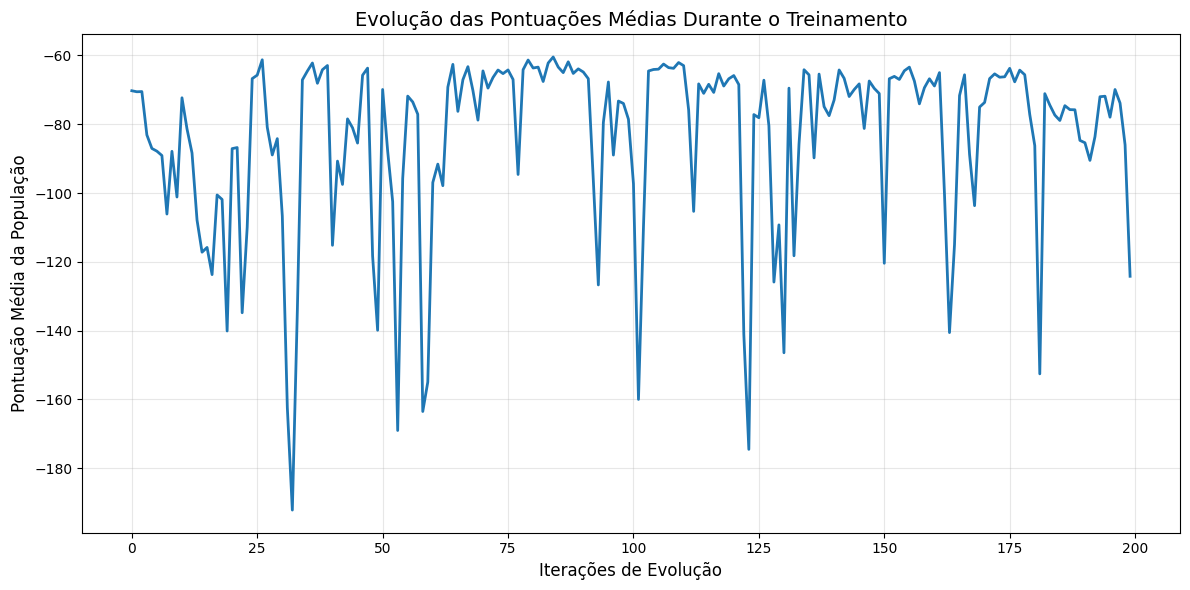

🚀 Training Progress │ 100% │ ████████████████████ │ 2000000/2000000 steps │ ⏱️ 3:15:00 │ ⏳ 00:00 │ 170.93step/s


In [ ]:
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("===== AgileRL Online Multi-Agent Demo =====")

    # Define the network configuration
    NET_CONFIG = {
        "latent_dim": 64,
        "encoder_config": {
            "hidden_size": [64],  # Actor hidden size
        },
        "head_config": {
            "hidden_size": [64],  # Critic hidden size
        },
    }
    

    # Define the initial hyperparameters
    INIT_HP = {
        "POPULATION_SIZE": 4,
        "ALGO": "MATD3",  # Algorithm
        "BATCH_SIZE": 128,  # Batch size
        "O_U_NOISE": True,  # Ornstein Uhlenbeck action noise
        "EXPL_NOISE": 0.1,  # Action noise scale
        "MEAN_NOISE": 0.0,  # Mean action noise
        "THETA": 0.15,  # Rate of mean reversion in OU noise
        "DT": 0.01,  # Timestep for OU noise
        "LR_ACTOR": 0.0001,  # Actor learning rate
        "LR_CRITIC": 0.001,  # Critic learning rate
        "GAMMA": 0.95,  # Discount factor
        "MEMORY_SIZE": 100000,  # Max memory buffer size
        "LEARN_STEP": 100,  # Learning frequency
        "TAU": 0.01,  # For soft update of target parameters
        "POLICY_FREQ": 2,  # Policy frequency
    }

    num_envs = 8

    def make_env():
        return simple_speaker_listener_v4.parallel_env(continuous_actions=True)

    env = make_multi_agent_vect_envs(env=make_env, num_envs=num_envs)

    # Configure the multi-agent algo input arguments
    observation_spaces = [env.single_observation_space(agent) for agent in env.agents]
    action_spaces = [env.single_action_space(agent) for agent in env.agents]

    # Append number of agents and agent IDs to the initial hyperparameter dictionary
    INIT_HP["AGENT_IDS"] = env.agents


    # Mutation config for RL hyperparameters
    hp_config = HyperparameterConfig(
        lr_actor=RLParameter(min=1e-4, max=1e-2),
        lr_critic=RLParameter(min=1e-4, max=1e-2),
        batch_size=RLParameter(min=8, max=512, dtype=int),
        learn_step=RLParameter(
            min=20, max=200, dtype=int, grow_factor=1.5, shrink_factor=0.75
        ),
    )

    # Create a population ready for evolutionary hyper-parameter optimisation
    pop: list[MATD3] = create_population(
    algo=INIT_HP["ALGO"],
    net_config=NET_CONFIG,
    INIT_HP=INIT_HP,
    observation_space=observation_spaces,
    action_space=action_spaces,
    hp_config=hp_config,
    population_size=INIT_HP["POPULATION_SIZE"],
    num_envs=num_envs,
    device=device,
)

    # Configure the multi-agent replay buffer
    field_names = ["obs", "action", "reward", "next_obs", "done"]
    memory = MultiAgentReplayBuffer(
        INIT_HP["MEMORY_SIZE"],
        field_names=field_names,
        agent_ids=INIT_HP["AGENT_IDS"],
        device=device,
    )

    # Instantiate a tournament selection object (used for HPO)
    tournament = TournamentSelection(
        tournament_size=2,  # Tournament selection size
        elitism=True,  # Elitism in tournament selection
        population_size=INIT_HP["POPULATION_SIZE"],  # Population size
        eval_loop=1,  # Evaluate using last N fitness scores
    )

    # Instantiate a mutations object (used for HPO)
    mutations = Mutations(
        no_mutation=0.2,  # Probability of no mutation
        architecture=0.2,  # Probability of architecture mutation
        new_layer_prob=0.2,  # Probability of new layer mutation
        parameters=0.2,  # Probability of parameter mutation
        activation=0,  # Probability of activation function mutation
        rl_hp=0.2,  # Probability of RL hyperparameter mutation
        mutation_sd=0.1,  # Mutation strength
        rand_seed=1,
        device=device,
    )

    # Define training loop parameters
    max_steps = 2_000_000  # Max steps (default: 2000000)
    learning_delay = 0  # Steps before starting learning
    evo_steps = 10_000  # Evolution frequency
    eval_steps = None  # Evaluation steps per episode - go until done
    eval_loop = 1  # Number of evaluation episodes
    elite = pop[0]  # Assign a placeholder "elite" agent
    total_steps = 0
    
    # Lista para armazenar pontuações médias para plotagem
    training_scores_history = []

    # TRAINING LOOP
    print("Training...")
    pbar = default_progress_bar(max_steps)
    while np.less([agent.steps[-1] for agent in pop], max_steps).all():
        pop_episode_scores = []
        for agent in pop:  # Loop through population
            agent.set_training_mode(True)
            obs, info = env.reset()  # Reset environment at start of episode
            scores = np.zeros(num_envs)
            completed_episode_scores = []
            steps = 0
            for idx_step in range(evo_steps // num_envs):
                action, raw_action = agent.get_action(
                    obs=obs, infos=info
                )  # Predict action
                next_obs, reward, termination, truncation, info = env.step(
                    action
                )  # Act in environment

                scores += np.sum(np.array(list(reward.values())).transpose(), axis=-1)
                total_steps += num_envs
                steps += num_envs

                # Save experiences to replay buffer
                memory.save_to_memory(
                    obs,
                    raw_action,
                    reward,
                    next_obs,
                    termination,
                    is_vectorised=True,
                )

                # Learn according to learning frequency
                # Handle learn steps > num_envs
                if agent.learn_step > num_envs:
                    learn_step = agent.learn_step // num_envs
                    if (
                        idx_step % learn_step == 0
                        and len(memory) >= agent.batch_size
                        and memory.counter > learning_delay
                    ):
                        experiences = memory.sample(
                            agent.batch_size
                        )  # Sample replay buffer
                        agent.learn(
                            experiences
                        )  # Learn according to agent's RL algorithm

                # Handle num_envs > learn step; learn multiple times per step in env
                elif (
                    len(memory) >= agent.batch_size and memory.counter > learning_delay
                ):
                    for _ in range(num_envs // agent.learn_step):
                        experiences = memory.sample(
                            agent.batch_size
                        )  # Sample replay buffer
                        agent.learn(
                            experiences
                        )  # Learn according to agent's RL algorithm

                obs = next_obs

                # Calculate scores and reset noise for finished episodes
                reset_noise_indices = []
                term_array = np.array(list(termination.values())).transpose()
                trunc_array = np.array(list(truncation.values())).transpose()
                for idx, (d, t) in enumerate(zip(term_array, trunc_array)):
                    if np.any(d) or np.any(t):
                        completed_episode_scores.append(scores[idx])
                        agent.scores.append(scores[idx])
                        scores[idx] = 0
                        reset_noise_indices.append(idx)

                agent.reset_action_noise(reset_noise_indices)

            pbar.update(evo_steps // len(pop))

            agent.steps[-1] += steps
            pop_episode_scores.append(completed_episode_scores)

        # Evaluate population
        fitnesses = [
            agent.test(
                env,
                max_steps=eval_steps,
                loop=eval_loop,
            )
            for agent in pop
        ]
        mean_scores = [
            (
                np.mean(episode_scores)
                if len(episode_scores) > 0
                else 0
            )
            for episode_scores in pop_episode_scores
        ]
        
        # Salvar pontuação média da população para plotagem
        population_mean_score = np.mean([score for score in mean_scores if isinstance(score, (int, float))])
        training_scores_history.append(population_mean_score)

        mean_scores_display = [
            (
                score if isinstance(score, (int, float))
                else "0 completed episodes"
            )
            for score in mean_scores
        ]

        pbar.write(
            f"--- Global steps {total_steps} ---\n"
            f"Steps {[agent.steps[-1] for agent in pop]}\n"
            f"Scores: {mean_scores_display}\n"
            f"Fitnesses: {['%.2f' % fitness for fitness in fitnesses]}\n"
            f"5 fitness avgs: {['%.2f' % np.mean(agent.fitness[-5:]) for agent in pop]}\n"
            f"Mutations: {[agent.mut for agent in pop]}"
        )

        # Tournament selection and population mutation
        elite, pop = tournament.select(pop)
        pop = mutations.mutation(pop)

        # Update step counter
        for agent in pop:
            agent.steps.append(agent.steps[-1])

    # Save the trained algorithm
    path = "./models/MATD3"
    filename = "MATD3_trained_agent.pt"
    os.makedirs(path, exist_ok=True)
    save_path = os.path.join(path, filename)
    elite.save_checkpoint(save_path)
    
    # Plotar e salvar a evolução das pontuações
    plt.figure(figsize=(12, 6))
    plt.plot(training_scores_history, linewidth=2)
    plt.title('Evolução das Pontuações Médias Durante o Treinamento', fontsize=14)
    plt.xlabel('Iterações de Evolução', fontsize=12)
    plt.ylabel('Pontuação Média da População', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Salvar o gráfico
    plot_path = os.path.join(path, "training_scores_evolution.png")
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"Gráfico de evolução das pontuações salvo em: {plot_path}")
    
    # Salvar dados das pontuações em arquivo numpy
    scores_data_path = os.path.join(path, "training_scores_history.npy")
    np.save(scores_data_path, np.array(training_scores_history))
    print(f"Dados das pontuações salvos em: {scores_data_path}")
    
    plt.show()

    pbar.close()
    env.close()
